#Combine Data Cleaning, Feature Selection, Modeling and Interpretability

Abstract

Customer churn has become a major problem in banking industry and banks have always tried to track customer interaction with the company to detect early warning signs in customer’s behavior.In this notebook we perform classification on whether a customer would be exit or not based on some factors and patterns.

The Bank Customer Churn dataset contains the following features:

1.CustomerID

2.Credit Score

3.Country

4.Gender

5.Age

6.Tenure

7.Balance

8.Product Number

9.Credit Card

10.Active Member

11.Estimated Salary

12.Churn

In [1]:
#importing packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf #OLS model Library

In [2]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=05f86e91ea0dad0d95cfd899f885fcaba69905edbfec6ccb3916e35534a03382
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [5]:
!pip install shap
import shap
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import statsmodels.api as sm  #importing statsmodel for OLS regression
from statsmodels.graphics.gofplots import qqplot
import missingno as msno

from sklearn import model_selection
from sklearn.model_selection import  train_test_split #for splitting data into train, test and validation data
from sklearn.linear_model import LinearRegression ,LogisticRegression # for fitting to get permutation
from sklearn.ensemble import RandomForestClassifier #for modeling with RandomForest model
from sklearn import datasets, linear_model
import eli5
from eli5.sklearn import PermutationImportance
 #Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score,recall_score,f1_score
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import *

In [6]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 1.8 MB/s eta 0:00:00


In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/anshvaghela2099/INFO-6105/main/Bank_Customer_Churn_Prediction.csv")

In [8]:
df.shape

(10000, 12)

In [9]:
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [10]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [13]:
#numeric columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [14]:
#categorical columns
catg_cols = df.select_dtypes('object').columns
catg_cols

Index(['country', 'gender'], dtype='object')

In [15]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**There are no missing values in the data**

**Dropping feature Customer ID - Customer ID is randomly allocated to a customer and does not depend on anything**

In [16]:
df = df.drop(["customer_id"],axis = 1)

In [17]:
df.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [19]:
df.describe()

credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

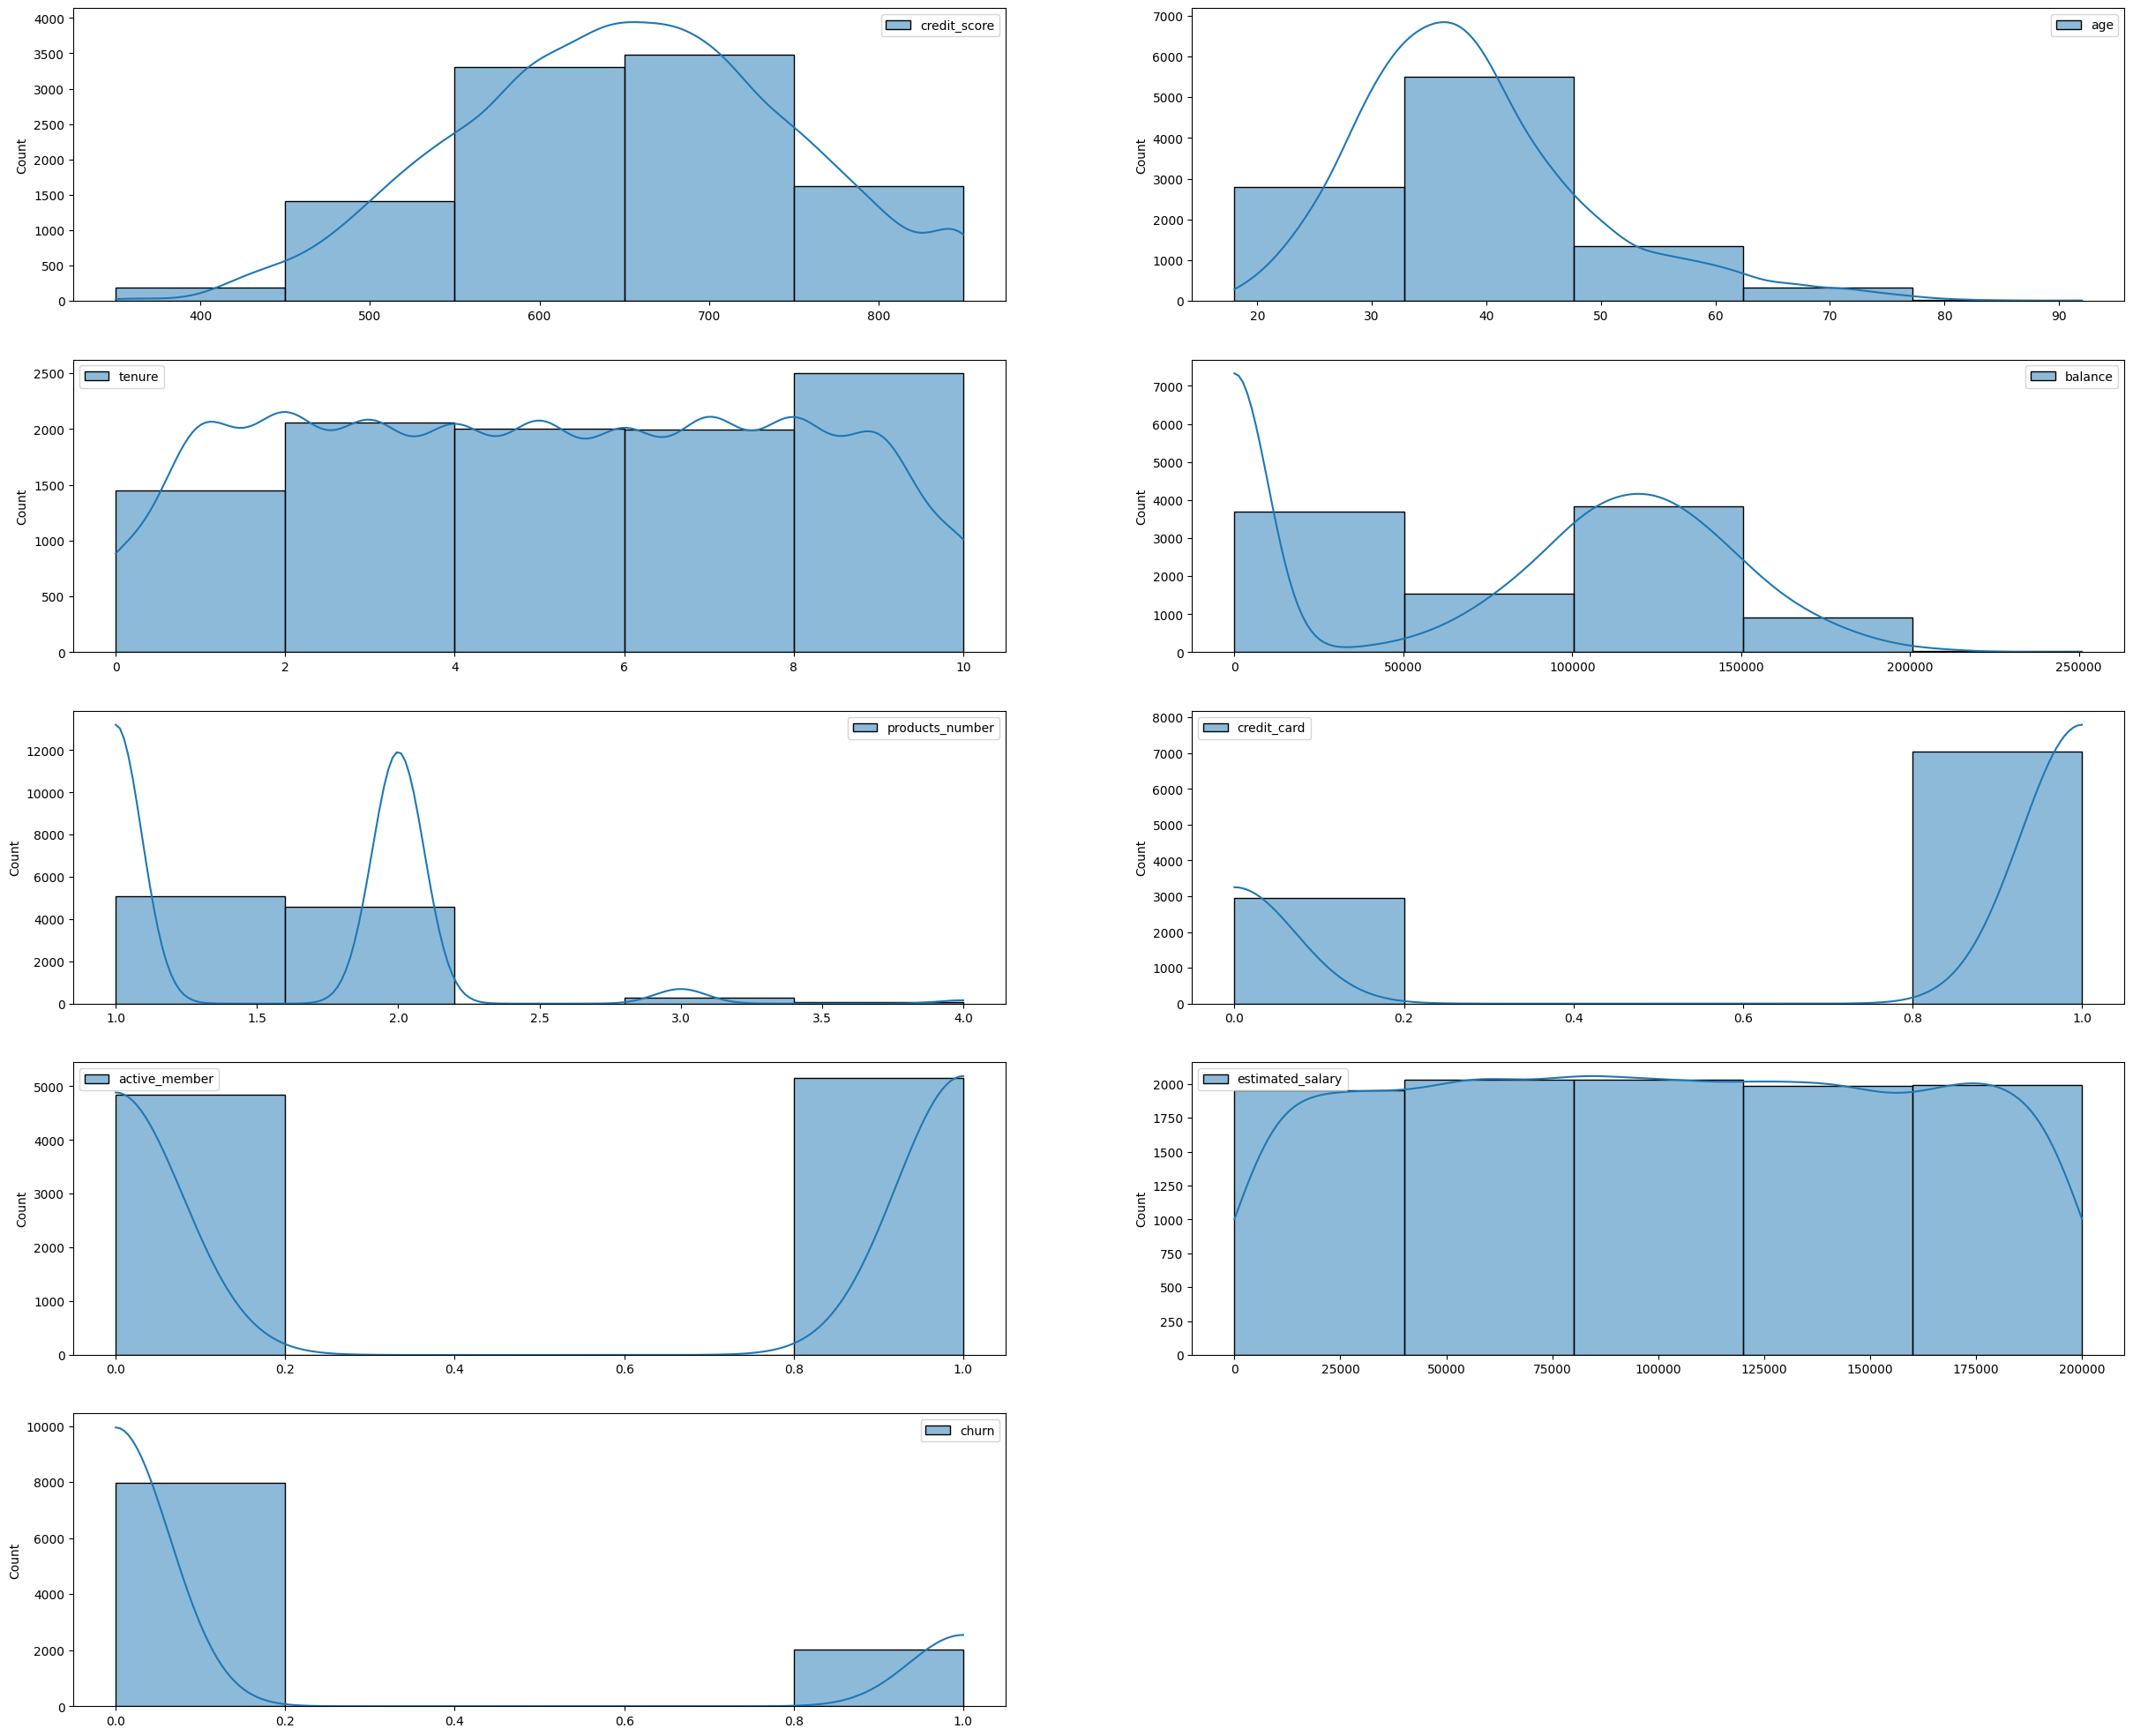

In [20]:
numerical_ft = [["credit_score"],["age"],["tenure"],["balance"],["products_number"],["credit_card"],["active_member"],["estimated_salary"],["churn"]]
plt.figure(figsize=(30,25))
for i,col in enumerate(numerical_ft,1):
    plt.subplot(5,2,i)
    sns.histplot(df[col],kde=True,bins = 5)

credit_score looks like a normal distribution

age is slightly right skewed

balance is slightly left skewed

estimated_salary closely follows normal distribution.

<Axes: xlabel='active_member', ylabel='count'>

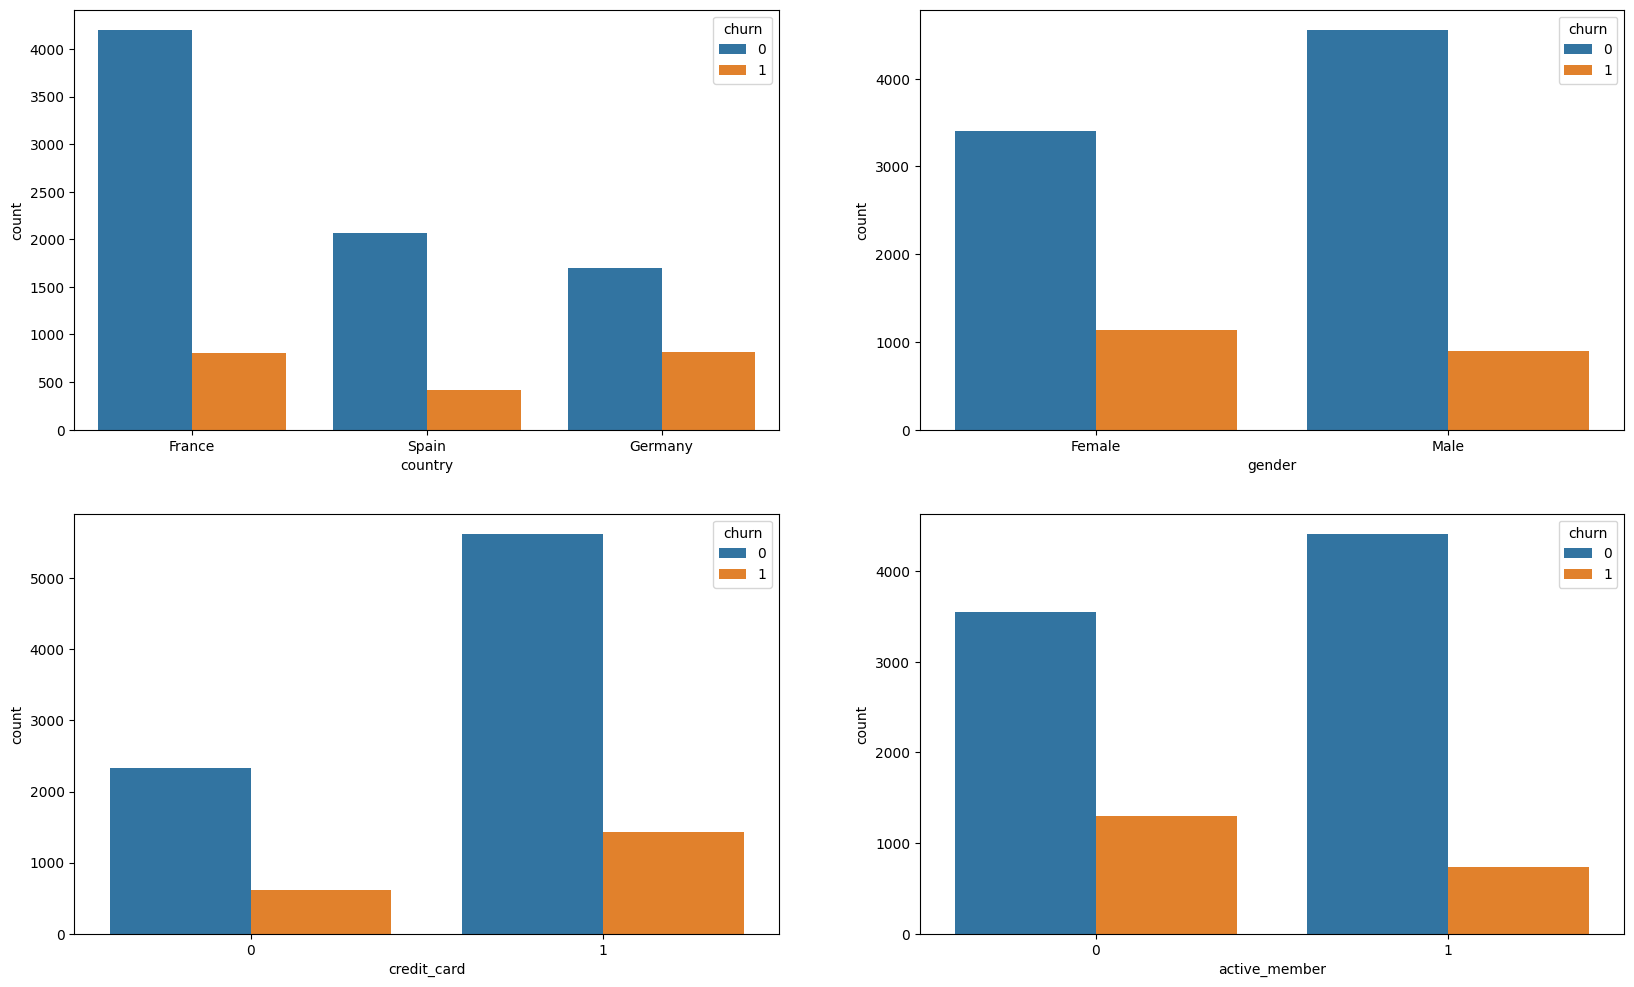

In [21]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='country', hue = 'churn',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[1][1])

<Axes: xlabel='churn', ylabel='estimated_salary'>

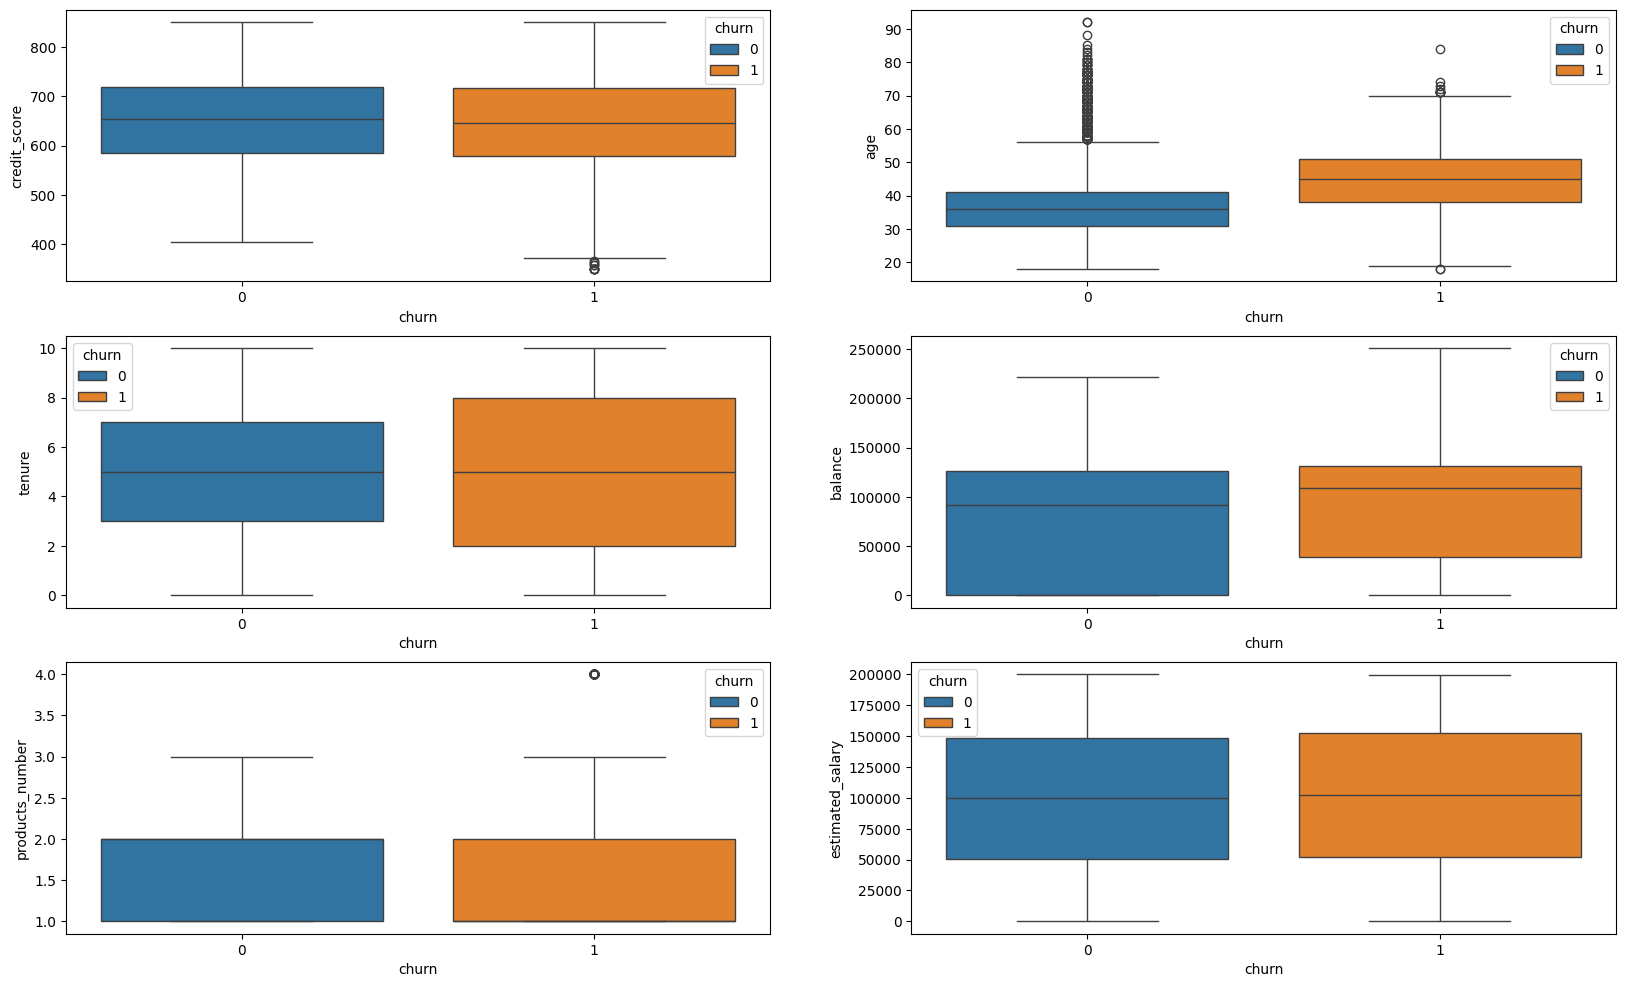

In [22]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])

**The boxplot shows that there are visible outliers in age and credit_score and should be imputed moving forward.**

In [23]:
df_with_outliers = df.copy()

# Encoding Features

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df[column])
    # Replace the dataframe column with the encoded values
    df[column] = le.transform(df[column])

print(df)

      credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0  

In [25]:
df['country'].unique()

array([0, 2, 1])

# Handling Outliers

In [26]:
#  using IQR method to impute outliers
def handle_outliers_iqr(df, feature,fac): # df = dataframe , feature = each feature , fac = 1.5 or 2 based on the use case
    Qan1 = df[f"{feature}"].quantile(0.25)
    Qan3 = df[f"{feature}"].quantile(0.75)
    IQR=Qan3-Qan1
    lower_limit=Qan1-fac*IQR
    upper_limit=Qan3+fac*IQR
    df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
    return df

In [27]:
handle_outliers_iqr(df , "age" , 1.5)
handle_outliers_iqr(df , "credit_score" , 1.5)

credit_score  country  gender   age  tenure  balance  products_number  \
0            228.0        0       0  24.0       2        0                0   
1            217.0        2       0  23.0       1      743                0   
2            111.0        0       0  24.0       8     5793                2   
3            308.0        0       0  21.0       1        0                1   
4            459.0        2       0  25.0       2     3696                0   
...            ...      ...     ...   ...     ...      ...              ...   
9995         380.0        0       1  21.0       5        0                1   
9996         125.0        0       1  17.0      10      124                0   
9997         318.0        0       0  18.0       7        0                0   
9998         381.0        1       1  24.0       3      427                1   
9999         401.0        0       0  10.0       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0               1              1              5068      1  
1               0              1              5639      0  
2               1              0              5707      1  
3               0              0              4704      0  
4               1              1              3925      0  
...           ...            ...               ...    ...  
9995            1              0              4827      0  
9996            1              1              5087      0  
9997            0              1              2062      1  
9998            1              0              4639      1  
9999            1              0              1878      0  

[10000 rows x 11 columns]

In [28]:
df[["age"]].describe(), df[["age"]].quantile(0.25), df[["age"]].quantile(0.75)

(                age
 count  10000.000000
 mean      19.832250
 std        8.646199
 min        0.000000
 25%       14.000000
 50%       19.000000
 75%       25.000000
 max       44.000000,
 age    14.0
 Name: 0.25, dtype: float64,
 age    25.0
 Name: 0.75, dtype: float64)

In [29]:
df[["credit_score"]].describe(), df[["credit_score"]].quantile(0.25), df[["credit_score"]].quantile(0.75)

(       credit_score
 count  10000.000000
 mean     259.584600
 std       96.496107
 min        0.000000
 25%      193.000000
 50%      261.000000
 75%      327.000000
 max      459.000000,
 credit_score    193.0
 Name: 0.25, dtype: float64,
 credit_score    327.0
 Name: 0.75, dtype: float64)

# Feature Scaling

<Axes: >

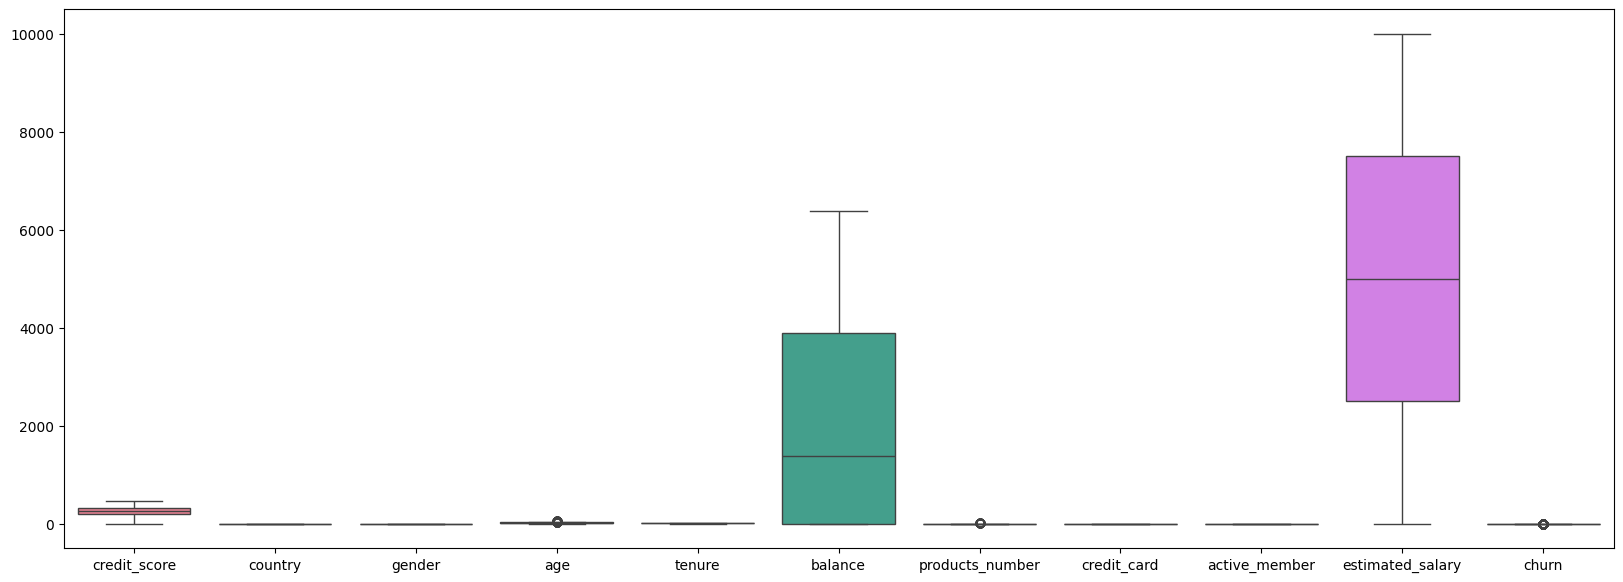

In [31]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

**The above diagram shows that all the predictors are not in the same range. So, it is advisable to scale all the features in same range for better modelling.**

In [32]:
from sklearn import preprocessing

num_feat = ["credit_score","age","tenure","balance","products_number","credit_card","active_member","estimated_salary","churn"]
# Create x to store scaled values as floats
x = df[num_feat].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[num_feat] = pd.DataFrame(x_scaled)

<Axes: >

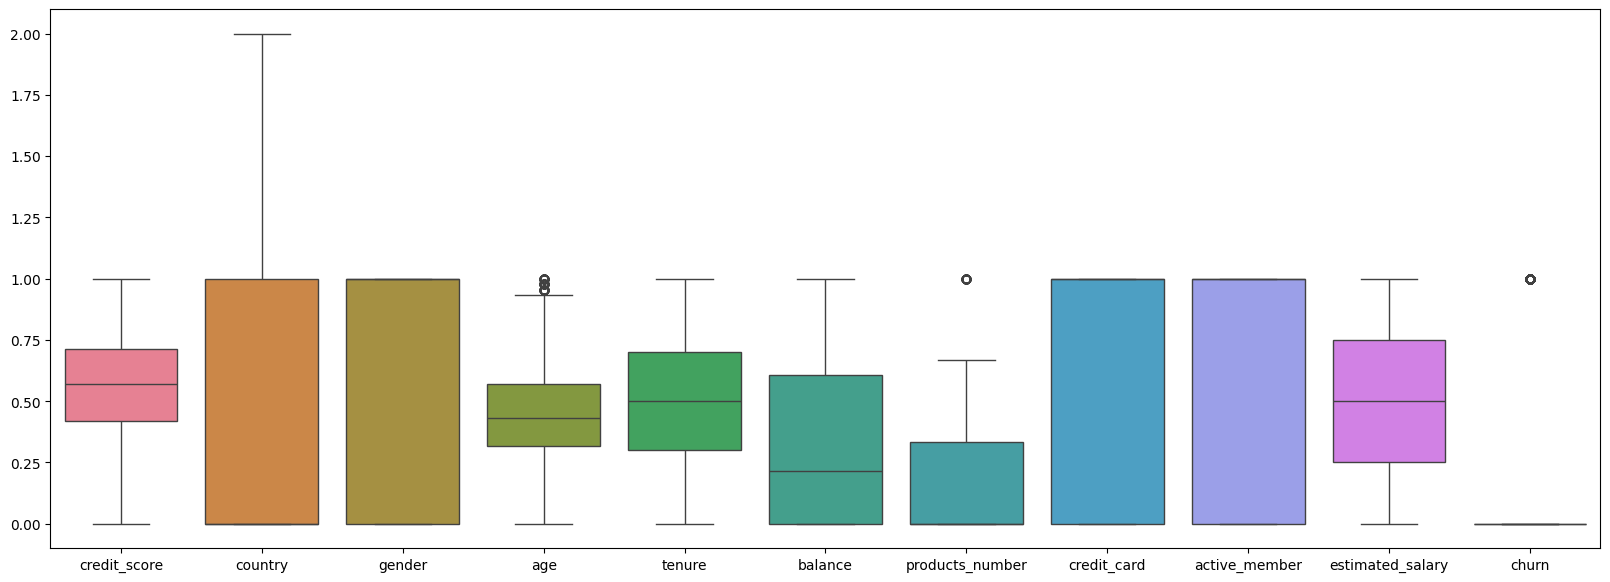

In [33]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

# Feature Importance

<Axes: >

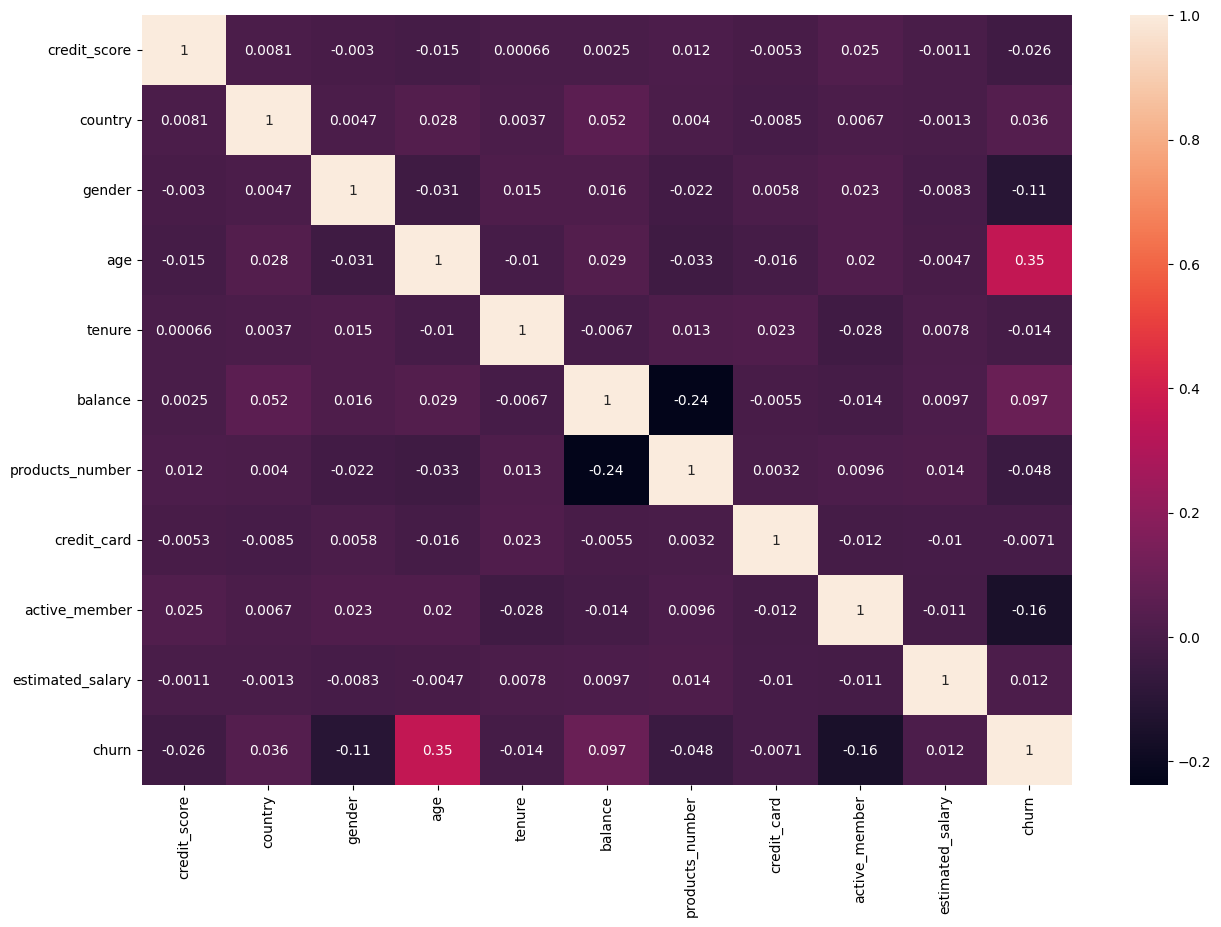

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

<Axes: >

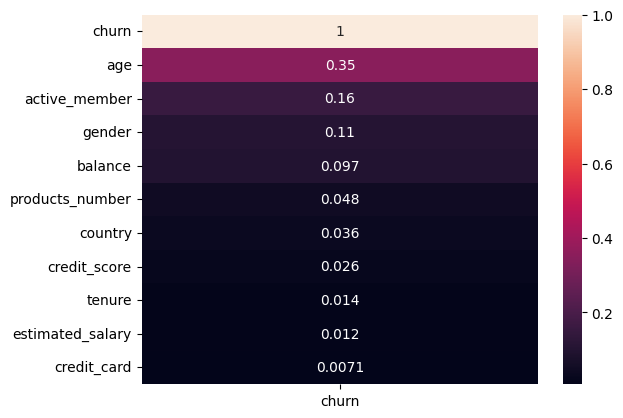

In [36]:
corr=df.corr()["churn"]
corr=corr.abs().sort_values(ascending=False)
sns.heatmap(data=corr.to_frame(),annot=True)

**The most important variables are listed at the top of the heatmap, based on the absolute value of their correlation coefficient. In this case, the top variables are:**

**age (0.35)**

**active_member (0.16)**

**gender (0.11)**

**balance (0.097)**

# Checking for Multicollinearity in the model

In [37]:
numeric_cols = df.select_dtypes(exclude = "object").columns

vif_df = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(25)

feature       VIF
0       credit_score  6.062816
1            country  1.784289
2             gender  2.126318
3                age  5.869464
4             tenure  3.585268
5            balance  1.967567
6    products_number  1.851828
7        credit_card  3.083223
8      active_member  2.061470
9   estimated_salary  3.556324
10             churn  1.509340

**From the heat map and the VIF result, we can see some predictor variables are highly related to other predictor variables**

# OLS Regression

In [38]:
cols = df.columns.tolist()
cols.remove("churn")
model = sm.OLS(df['churn'], df[cols]).fit()
model.summary() #sumarizes the stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  churn   R-squared (uncentered):                   0.337
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              508.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        20:03:49   Log-Likelihood:                         -4175.5
No. Observations:               10000   AIC:                                      8371.
Df Residuals:                    9990   BIC:                                      8443.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score        -0.0436      0.015     -2.910      0.004      -0.073      -0.014
country              0.0108      0.004      2.459      0.014       0.002       0.019
gender              -0.0778      0.007    -10.785      0.000      -0.092      -0.064
age                  0.7045      0.017     42.231      0.000       0.672       0.737
tenure              -0.0229      0.012     -1.904      0.057      -0.046       0.001
balance              0.0950      0.011      8.528      0.000       0.073       0.117
products_number     -0.0412      0.019     -2.159      0.031      -0.079      -0.004
credit_card         -0.0046      0.008     -0.602      0.547      -0.020       0.010
active_member       -0.1304      0.007    -18.020      0.000      -0.145      -0.116
estimated_salary     0.0098      0.012      0.819      0.413      -0.014       0.033
==============================================================================
Omnibus:                     1484.121   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2247.910
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       3.256   Cond. No.                         9.34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the significance value of 0.05

credit_score has the p-value 0.04, which is lesser and hence it is a significant feature.

country has the p-value 0.014, which is lesser and hence it is a significant feature.

gender has the p-value 0, which is lesser and hence it is a significant feature.

age has the p-value 0, which is lesser and hence it is a significant feature.

tenure has the p-value 0.057, which is which is slightly more than the threshold value of 0.05 and hence it is a non-significant feature.

balance has the p-value 0, which is lesser and hence it is a significant feature.

products_number has the p-value 0.031, which is lesser and hence it is a significant feature.

credit_card has the p-value 0.547, which is greater than the significant value i.e 0.05 and hence it is a non-significant feature.

active_member has the p-value 0, which is lesser and hence it is a significant feature.

estimated_salary has the p-value 0.413, which is greater and hence it is a non-significant feature.

# Permutation Importance

In [39]:
def get_permutation_importance(df):
    X = df[["credit_score","age","tenure","balance","products_number","credit_card","active_member","estimated_salary"]]
    y = df[["churn"]]
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    # Create linear regression object
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    pi = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(pi, feature_names = X_test.columns.tolist())

In [40]:
get_permutation_importance(df)

**From the above results, we can drop estimated_salary and credit_card as they are non-significant in determining the churn feature**

In [41]:
df = df.drop(['credit_card', 'estimated_salary'],axis = 1)
df

credit_score  country  gender       age  tenure   balance  \
0         0.496732        0       0  0.545455     0.2  0.000000   
1         0.472767        2       0  0.522727     0.1  0.116439   
2         0.241830        0       0  0.545455     0.8  0.907851   
3         0.671024        0       0  0.477273     0.1  0.000000   
4         1.000000        2       0  0.568182     0.2  0.579220   
...            ...      ...     ...       ...     ...       ...   
9995      0.827887        0       1  0.477273     0.5  0.000000   
9996      0.272331        0       1  0.386364     1.0  0.019433   
9997      0.692810        0       0  0.409091     0.7  0.000000   
9998      0.830065        1       1  0.545455     0.3  0.066917   
9999      0.873638        0       0  0.227273     0.4  0.644413   

      products_number  active_member  churn  
0            0.000000            1.0    1.0  
1            0.000000            1.0    0.0  
2            0.666667            0.0    1.0  
3            0.333333            0.0    0.0  
4            0.000000            1.0    0.0  
...               ...            ...    ...  
9995         0.333333            0.0    0.0  
9996         0.000000            1.0    0.0  
9997         0.000000            1.0    1.0  
9998         0.333333            0.0    1.0  
9999         0.000000            0.0    0.0  

[10000 rows x 9 columns]

<Figure size 600x400 with 0 Axes>

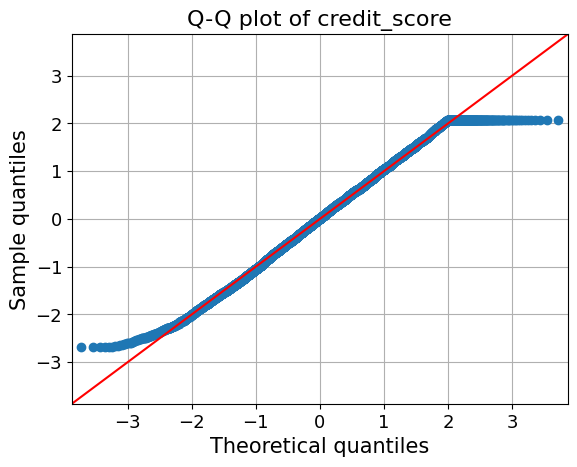

<Figure size 600x400 with 0 Axes>

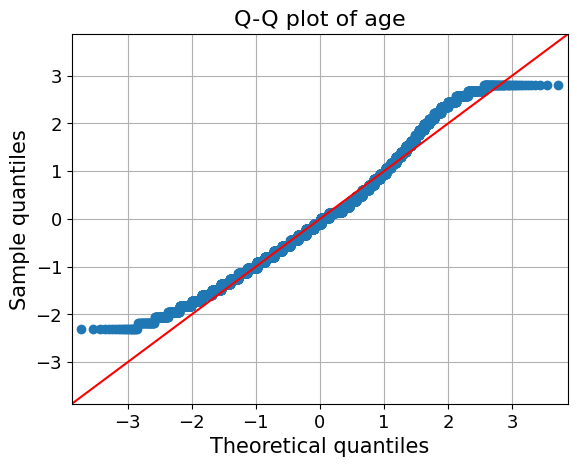

<Figure size 600x400 with 0 Axes>

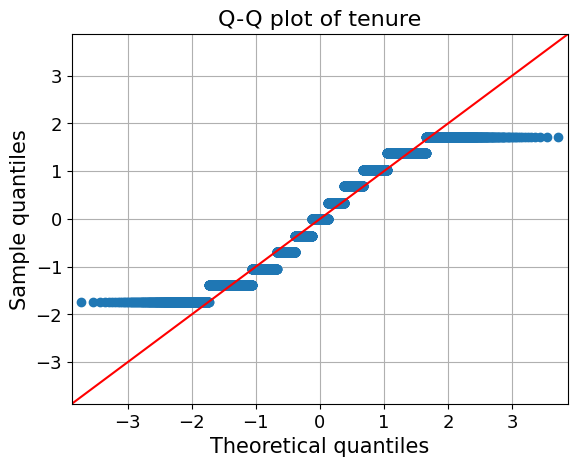

<Figure size 600x400 with 0 Axes>

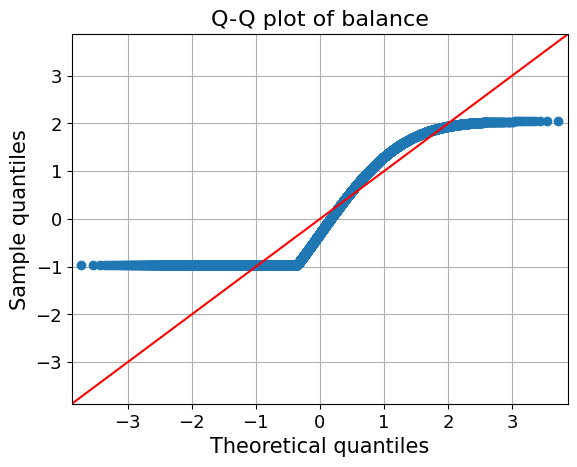

<Figure size 600x400 with 0 Axes>

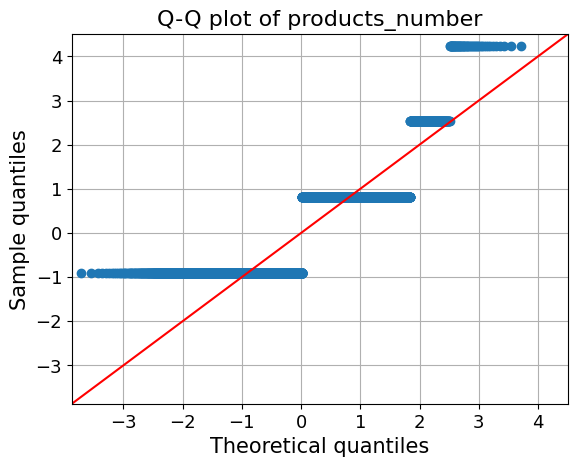

<Figure size 600x400 with 0 Axes>

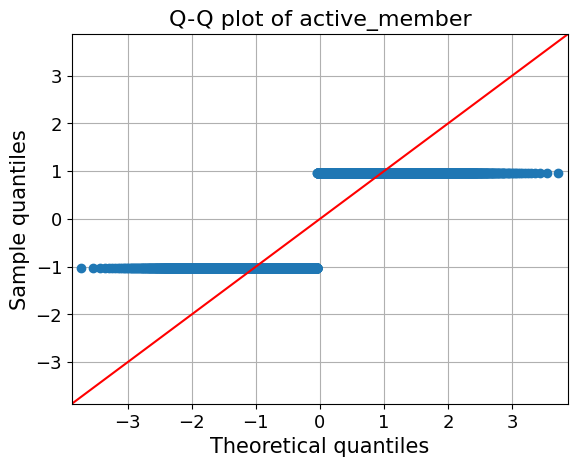

In [42]:
#checking the distribution of predictor variables
from statsmodels.graphics.gofplots import qqplot
norm_dist_data=df[['credit_score','age','tenure','balance','products_number','active_member']]
for c in norm_dist_data.columns[:]:
  plt.figure(figsize=(6,4))
  fig=qqplot(df[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

# Splitting the dataset into Training and Test set

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

independent_cols = ["credit_score","country","gender","age","tenure","balance","products_number","active_member"]

X = df[independent_cols]
y = df["churn"]

X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=42,train_size=0.8,stratify=y)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
      credit_score  country  gender       age  tenure   balance  \
2151      0.788671        0       1  0.886364     0.7  0.000000   
8392      0.758170        1       1  0.318182     0.3  0.270804   
5006      0.793028        1       0  0.431818     0.0  0.420467   
4117      0.370370        0       1  0.431818     0.5  0.000000   
7182      0.655773        1       1  0.704545     0.6  0.376743   

      products_number  active_member  
2151         0.000000            0.0  
8392         0.000000            0.0  
5006         0.333333            1.0  
4117         0.333333            0.0  
7182         0.333333            1.0  

X_test : 
      credit_score  country  gender       age  tenure   balance  \
5702      0.422658        0       1  0.409091     0.7  0.000000   
3667      0.291939        1       1  0.340909     0.4  0.653659   
1617      0.361656        2       0  0.500000     0.4  0.000000   
5673      0.540305        2       1  0.363636     0.5  0.748472   
4272  

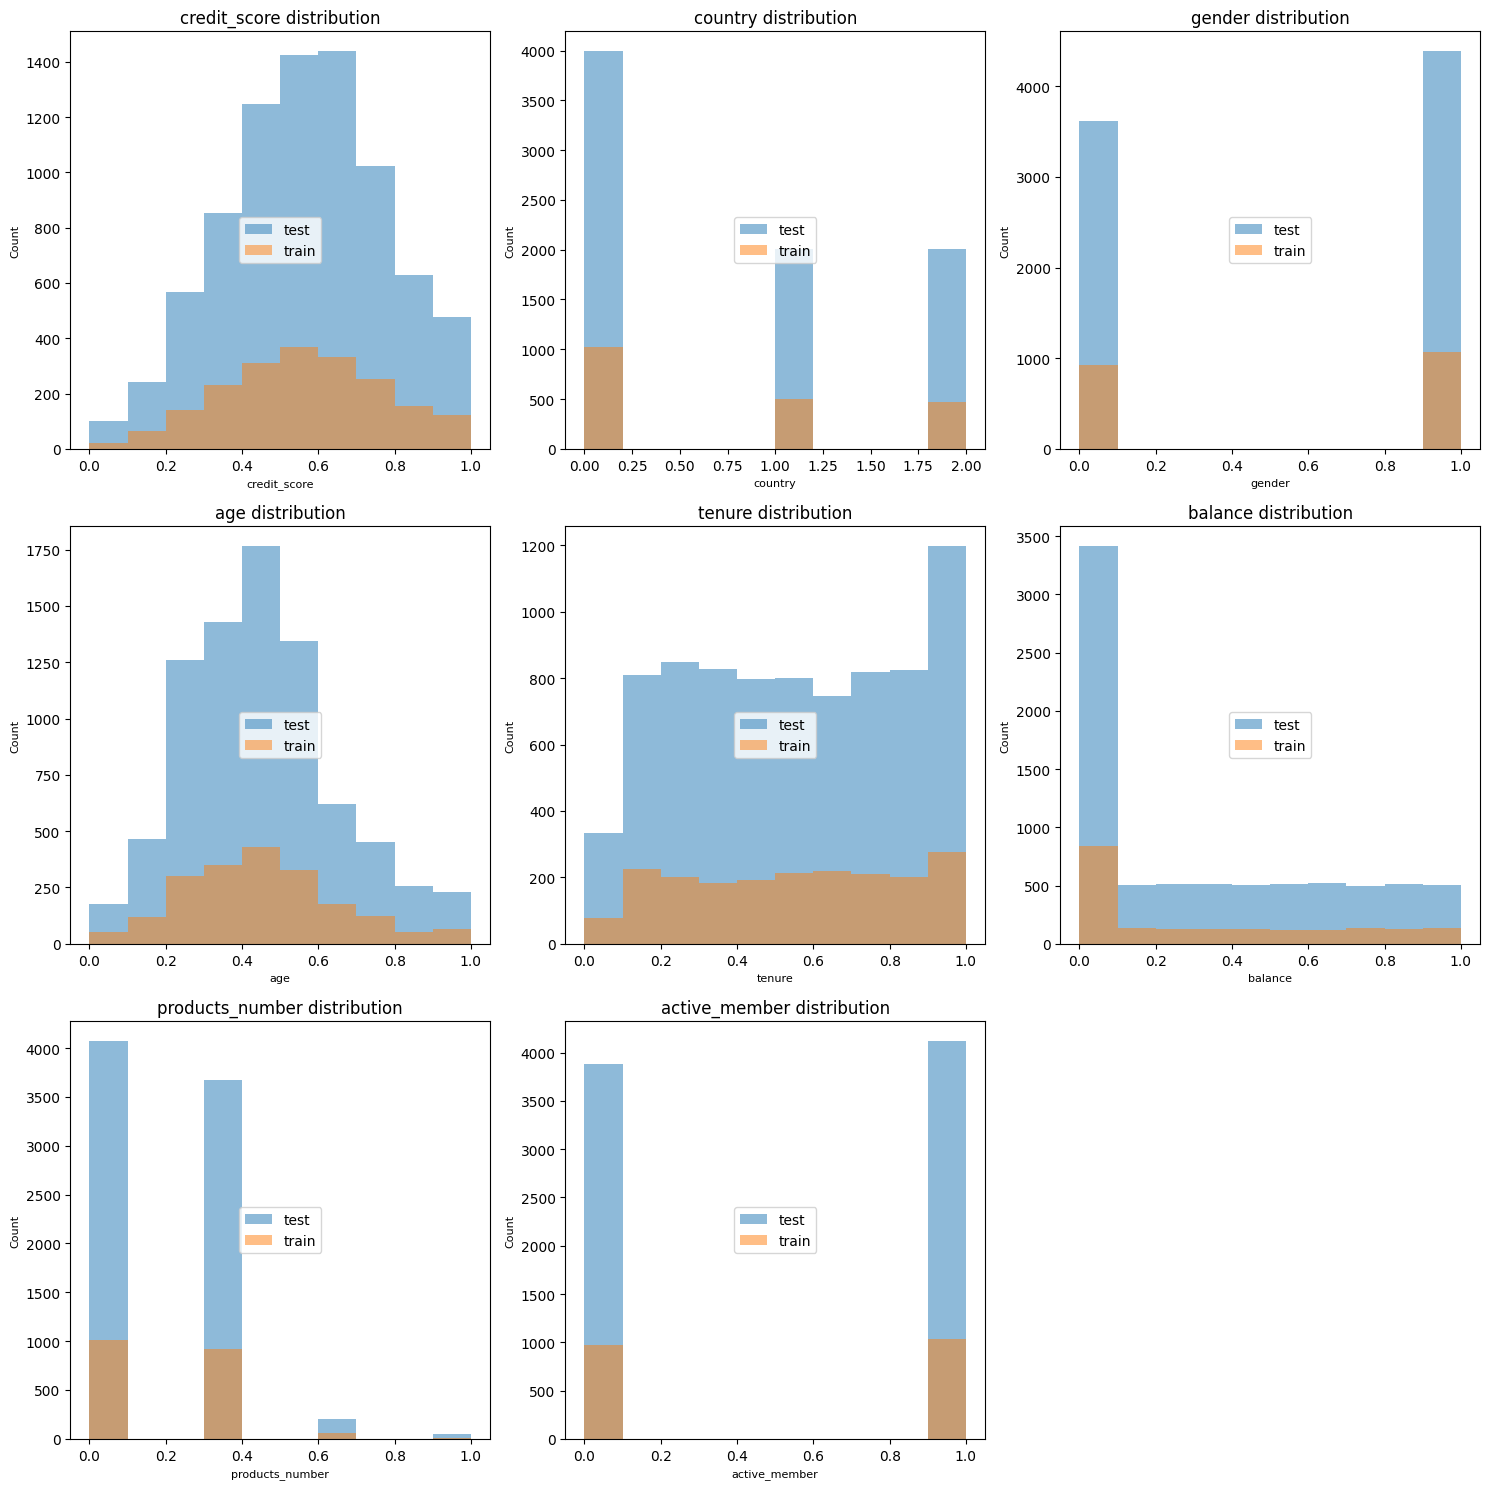

In [44]:
#plotting training and testing data distribution
cols=3
rows=((len(X_train.columns)-1) // cols)+1
counter=1
plt.rcParams['figure.figsize']=[5*cols, 5*rows]
for c in X_train.columns[:]:
    plt.subplot(rows, cols, counter)
    plt.hist(X_train[c], alpha=0.5, label="test")
    plt.hist(X_test[c], alpha=0.5, label="train")
    plt.xlabel(c, size=8)
    plt.ylabel("Count", size=8)
    plt.legend(loc="center")
    plt.title("{} distribution".format(c), size=12)
    counter+=1
plt.tight_layout()
plt.show()

**From the above graphs, we can observe that there is similar distribution between the training and testing data**

# Logistic Regression

In [45]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)

#printing the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-3.04887019]
The coefficient b1=  [[-0.3348984   0.09355753 -0.53655751  4.69839008 -0.05388016  0.70527664
  -0.27569031 -0.93292171]]


In [46]:
lr_y_predict = modelLogistic.predict(X_test)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test,lr_y_predict),2)}'],
     ["Precission_score", f'{round(precision_score(y_test,lr_y_predict),2)}'],
     ["Recall_score", f'{round(recall_score(y_test,lr_y_predict),2)}'],
     ["F1-score",f'{round(f1_score(y_test,lr_y_predict),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))

print("-----------------------------------------------")

Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.82
Precission_score     0.65
Recall_score         0.26
F1-score             0.37
-----------------------------------------------


# Encoding Features of data with outliers

In [48]:
df_with_outliers.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df_with_outliers.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df_with_outliers[column])
    # Replace the dataframe column with the encoded values
    df_with_outliers[column] = le.transform(df_with_outliers[column])

print(df_with_outliers)

      credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0  

In [50]:
df_with_outliers = df_with_outliers.drop(['credit_card', 'estimated_salary'],axis = 1)
df_with_outliers

credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      active_member  churn  
0                 1      1  
1                 1      0  
2                 0      1  
3                 0      0  
4                 1      0  
...             ...    ...  
9995              0      0  
9996              1      0  
9997              1      1  
9998              0      1  
9999              0      0  

[10000 rows x 9 columns]

In [51]:
independent_cols = ["credit_score","country","gender","age","tenure","balance","products_number","active_member"]
X_out = df_with_outliers[independent_cols]
y_out = df_with_outliers["churn"]
# splitting train and test data
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, random_state=1,train_size=0.8,stratify=y)

In [ ]:
modelLogistic_out = LogisticRegression()
modelLogistic_out.fit(X_train_out,y_train_out)

In [54]:
lr_y_predict_out = modelLogistic_out.predict(X_test_out)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test_out,lr_y_predict_out),2)}'],
     ["Precission_score", f'{round(precision_score(y_test_out,lr_y_predict_out),2)}'],
     ["Recall_score", f'{round(recall_score(y_test_out,lr_y_predict_out),2)}'],
     ["F1-score",f'{round(f1_score(y_test_out,lr_y_predict_out),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))
print("-----------------------------------------------")

Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.81
Precission_score     0.64
Recall_score         0.21
F1-score             0.31
-----------------------------------------------


# Removing 1% 5% and 10% data and performing imputation

In [55]:
# For 1%
data1 = df.copy()

# For 5%
data5 = df.copy()

# For 10%
data10 = df.copy()

In [56]:
# Removing 1% data from column
df_percent1 = data1['products_number'].sample(frac = 0.01)
#using location of fraction data to set null
data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN

# Removing 5% data from column
df_percent5 = data5['products_number'].sample(frac = 0.05)
#using location of fraction data to set null
data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN

# Remoivng 10% data from column
df_percent10 = data10['products_number'].sample(frac = 0.1)
#using location of fraction data to set null
data10['products_number'].loc[data10.index.isin(df_percent10.index)] = np.NaN

In [57]:
# For 1%
data1['products_number'].isnull().sum()

100

In [58]:
# For 5%
data5['products_number'].isnull().sum()

500

In [59]:
# For 10%
data10['products_number'].isnull().sum()

1000

In [60]:
# Median
# For 1%
data1['products_number']=data1['products_number'].fillna(data1['products_number'].median())

# For 5%
data5['products_number']=data5['products_number'].fillna(data5['products_number'].median())

# For 10%
data10['products_number']=data10['products_number'].fillna(data10['products_number'].median())


In [61]:
#checking recovery after median imputation in column
print(data1['products_number'].isnull().sum())
print(data5['products_number'].isnull().sum())
print(data10['products_number'].isnull().sum())

0
0
0


# Using Mean Imputation Method

In [66]:
# Removing 1% data from column
df_percent1 = data1['products_number'].sample(frac = 0.01)
#using location of fraction data to set null
data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN

# Removing 5% data from column
df_percent5 = data5['products_number'].sample(frac = 0.05)
#using location of fraction data to set null
data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN

# Remoivng 10% data from column
df_percent10 = data10['products_number'].sample(frac = 0.1)
#using location of fraction data to set null
data10['products_number'].loc[data10.index.isin(df_percent10.index)] = np.NaN

In [67]:
# For 1%
data1['products_number'].isnull().sum()

100

In [68]:
# For 5%
data5['products_number'].isnull().sum()

500

In [69]:
# For 10%
data10['products_number'].isnull().sum()

1000

In [70]:
#Mean
# For 1%
data1['products_number'] = data1['products_number'].fillna(data1['products_number'].mean())

# For 5%
data5['products_number'] = data5['products_number'].fillna(data5['products_number'].mean())

# For 10%
data10['products_number'] =data10['products_number'].fillna(data10['products_number'].mean())

In [71]:
#checking recovery after Mean imputation in column

print(data1['products_number'].isnull().sum())
print(data5['products_number'].isnull().sum())
print(data10['products_number'].isnull().sum())

0
0
0


# Using Mode imputation Method to replace null values

In [72]:
# Removing 1% data from column
df_percent1 = data1['products_number'].sample(frac = 0.01)
#using location of fraction data to set null
data1['products_number'].loc[data1.index.isin(df_percent1.index)] = np.NaN

# Removing 5% data from column
df_percent5 = data5['products_number'].sample(frac = 0.05)
#using location of fraction data to set null
data5['products_number'].loc[data5.index.isin(df_percent5.index)] = np.NaN

# Remoivng 10% data from column
df_percent10 = data10['products_number'].sample(frac = 0.1)
#using location of fraction data to set null
data10['products_number'].loc[data10.index.isin(df_percent10.index)] = np.NaN

In [73]:
#For 1%
data1['products_number'].isnull().sum()

100

In [74]:
#For 5%
data5['products_number'].isnull().sum()

500

In [75]:
#For 10%
data10['products_number'].isnull().sum()

1000

In [76]:
# For 1%
data1['products_number'] = data1['products_number'].fillna(data1['products_number'].mode().iloc[0])

# For 5%
data5['products_number'] = data5['products_number'].fillna(data5['products_number'].mode().iloc[0])

# For 10%
data10['products_number'] = data10['products_number'].fillna(data10['products_number'].mode().iloc[0])

In [77]:
#checking recovery after Mode imputation in column

print(data1['products_number'].isnull().sum())
print(data5['products_number'].isnull().sum())
print(data10['products_number'].isnull().sum())

0
0
0


# Fitting a Tree Based Model

In [78]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.25992328672628695


**The code creates an instance of the DecisionTreeRegressor class named DTree. The max_depth parameter is set to 3, which limits the maximum depth of the decision tree to 3 levels which helps in preventing overfitting**

In [79]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [80]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-------------------------
MODEL EVALUATION

r2_score of the model: 
0.25992328672628695


In [81]:
prediction_tree = DTree.predict(X_test)

In [82]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.241685
RMSE: 0.346349
R2 0.259923


In [85]:
features = df[["credit_score","country","gender","age","tenure","balance","products_number","active_member"]]

[Text(0.5, 0.875, 'age <= 0.602\nsquared_error = 0.162\nsamples = 8000\nvalue = 0.204'),
 Text(0.25, 0.625, 'products_number <= 0.5\nsquared_error = 0.115\nsamples = 6438\nvalue = 0.133'),
 Text(0.125, 0.375, 'products_number <= 0.167\nsquared_error = 0.103\nsamples = 6281\nvalue = 0.117'),
 Text(0.0625, 0.125, 'squared_error = 0.151\nsamples = 3133\nvalue = 0.185'),
 Text(0.1875, 0.125, 'squared_error = 0.047\nsamples = 3148\nvalue = 0.049'),
 Text(0.375, 0.375, 'balance <= 0.021\nsquared_error = 0.177\nsamples = 157\nvalue = 0.771'),
 Text(0.3125, 0.125, 'squared_error = 0.249\nsamples = 63\nvalue = 0.524'),
 Text(0.4375, 0.125, 'squared_error = 0.06\nsamples = 94\nvalue = 0.936'),
 Text(0.75, 0.625, 'active_member <= 0.5\nsquared_error = 0.25\nsamples = 1562\nvalue = 0.496'),
 Text(0.625, 0.375, 'age <= 0.739\nsquared_error = 0.223\nsamples = 747\nvalue = 0.665'),
 Text(0.5625, 0.125, 'squared_error = 0.249\nsamples = 443\nvalue = 0.535'),
 Text(0.6875, 0.125, 'squared_error = 0.124

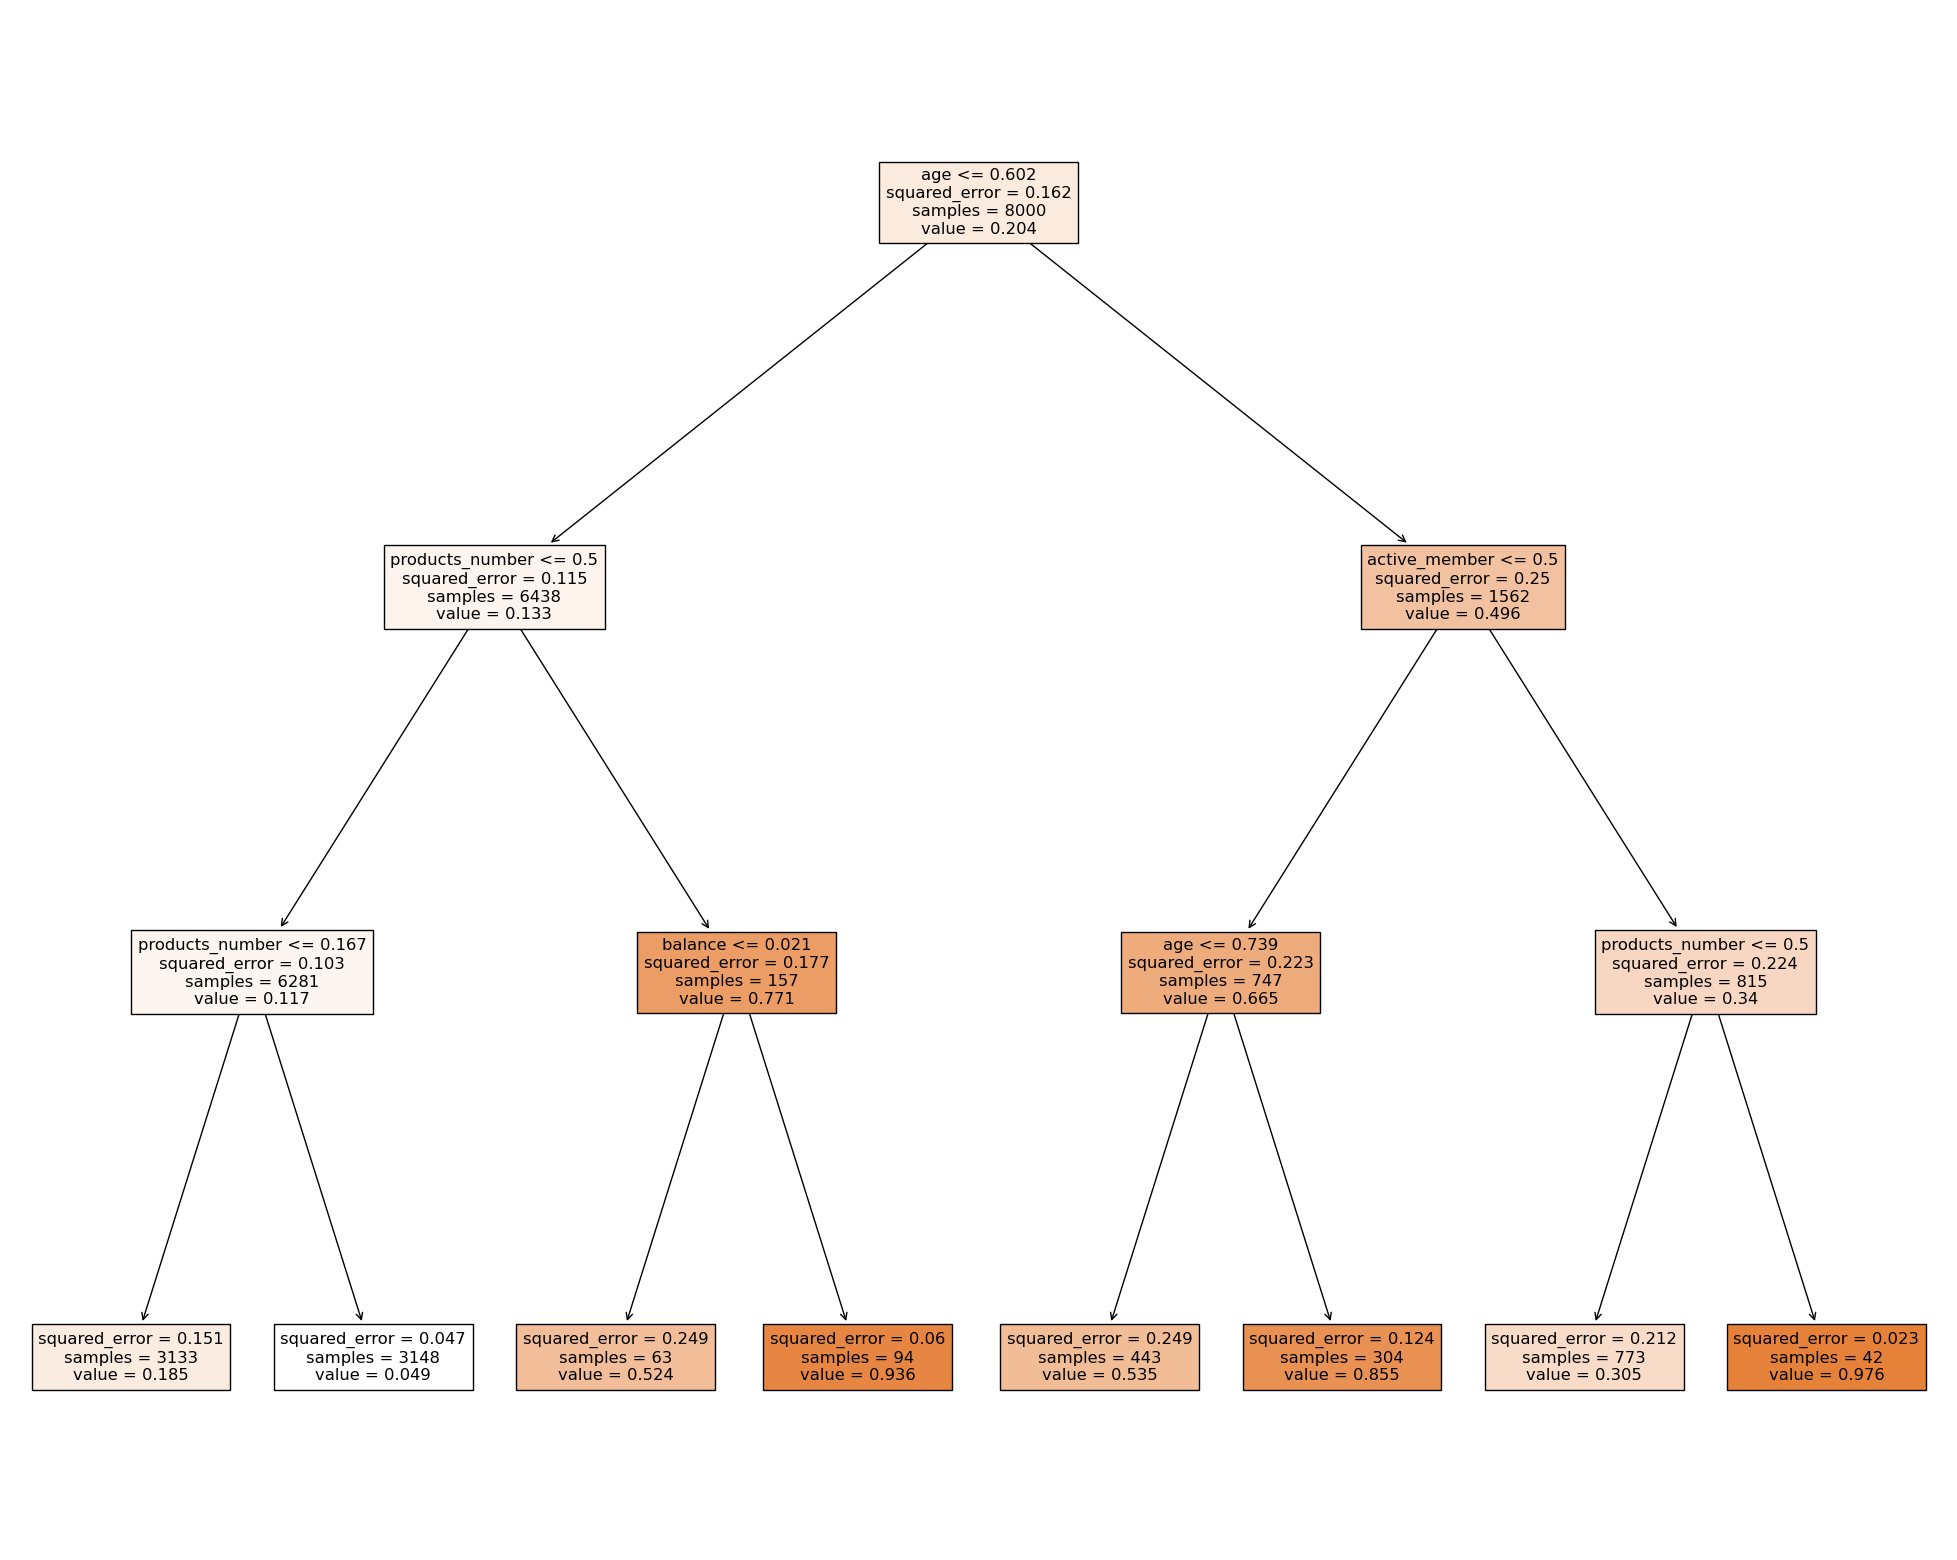

In [86]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

# AutoML to find the best model

In [87]:
!pip install h2o

In [88]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_pxohvqy
  JVM stdout: /tmp/tmp_pxohvqy/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_pxohvqy/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_59haep
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [97]:
dfaml = h2o.import_file("https://raw.githubusercontent.com/anshvaghela2099/INFO-6105/main/Bank_Customer_Churn_Prediction.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [98]:
dfaml.head(5)

customer_id    credit_score  country    gender      age    tenure    balance    products_number    credit_card    active_member    estimated_salary    churn
-------------  --------------  ---------  --------  -----  --------  ---------  -----------------  -------------  ---------------  ------------------  -------
  1.56346e+07             619  France     Female       42         2        0                    1              1                1            101349          1
  1.56473e+07             608  Spain      Female       41         1    83807.9                  1              0                1            112543          0
  1.56193e+07             502  France     Female       42         8   159661                    3              1                0            113932          1
  1.57014e+07             699  France     Female       39         1        0                    2              0                0             93826.6        0
  1.57379e+07             850  Spain      Female       43         2   125511                    1              1                1             79084.1        0
[5 rows x 12 columns]

In [99]:
train,test,valid = dfaml.split_frame(ratios=[.7, .15])

In [101]:
y = "churn"
x = dfaml.columns
x.remove(y)
x.remove("customer_id")

Here the target feature is churn for binary classification.

Removing customer_id as customer id is just unique identifier that is randomly allocated to a customer and does not contribute for our analysis

In [102]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [103]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
21:27:13.890: Project: AutoML_1_20240402_212713
21:27:13.892: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:27:13.892: Setting stopping tolerance adaptively based on the training frame: 0.011946314428672725
21:27:13.893: Build control seed: 10
21:27:13.894: training frame: Frame key: AutoML_1_20240402_212713_training_py_3_sid_b817    cols: 12    rows: 7007  chunks: 8    size: 147478  checksum: 1098148681790806684
21:27:13.897: validation frame: Frame key: py_5_sid_b817    cols: 12    rows: 1480  chunks: 8    size: 45228  checksum: 2443190158755040178
21:27:13.900: leaderboard frame: Frame key: py_5_sid_b817    cols: 12    rows: 1480  chunks: 8    size: 45228  checksum: 2443190158755040178
21:27:13.905: blending frame: NULL
21:27:13.905: response column: churn
21:27:13.905: fold column: null
21:27:13.905: weights column: null
21:27:13.976: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240402_212713


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          38688                  7            7            7             23            101           56.92

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.07664977668048854
RMSE: 0.27685696068635973
MAE: 0.17781470720140055
RMSLE: 0.19286905301985927
Mean Residual Deviance: 0.07664977668048854

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.10567151231719342
RMSE: 0.32507154953516526
MAE: 0.21088081582619955
RMSLE: 0.2273344929238301
Mean Residual Deviance: 0.10567151231719342

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-04-02 21:27:26  0.004 sec   0                  0.401766         0.322832        0.161416             0.405995           0.326248          0.164832
    2024-04-02 21:27:27  0.317 sec   5                  0.348051         0.27379         0.121139             0.358686           0.280969          0.128656
    2024-04-02 21:27:27  0.626 sec   10                 0.322347         0.243407        0.103907             0.340408           0.255121          0.115877
    2024-04-02 21:27:27  0.852 sec   15                 0.307935         0.223051        0.0948237            0.332083           0.238757          0.110279
    2024-04-02 21:27:28  1.049 sec   20                 0.299247         0.208185        0.0895487            0.328573           0.227814          0.10796
    2024-04-02 21:27:28  1.224 sec   25                 0.292492         0.197613        0.0855513            0.326727           0.219978          0.106751
    2024-04-02 21:27:28  1.392 sec   30                 0.288529         0.191189        0.0832488            0.326009           0.216044          0.106282
    2024-04-02 21:27:28  1.556 sec   35                 0.28498          0.186198        0.0812134            0.325099           0.213223          0.105689
    2024-04-02 21:27:28  1.706 sec   40                 0.281463         0.182365        0.0792217            0.325018           0.211972          0.105637
    2024-04-02 21:27:28  1.868 sec   45                 0.279005         0.180141        0.0778438            0.325237           0.211515          0.105779
    2024-04-02 21:27:29  2.030 sec   50                 0.276857         0.177815        0.0766498            0.325072           0.210881          0.105672

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
age               920.838                1                    0.320734
products_number   674.81                 0.732822             0.235041
balance           338.481                0.367579             0.117895
active_member     226.412                0.245876             0.0788608
estimated_salary  185.994                0.201984             0.0647831
credit_score      179.955                0.195426             0.0626797
country           163.438                0.177488             0.0569265
tenure            105.939                0.115047             0.0368994
gender            52.2297                0.0567198            0.018192
credit_card       22.935                 0.0249067            0.00798843

[tips]
Use `model.e

# Training the AutoML with training data

In [104]:
lb = aml.leaderboard

In [105]:
best_model = aml.get_best_model()

In [106]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240402_212713


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          38688                  7            7            7             23            101           56.92

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.07664977668048854
RMSE: 0.27685696068635973
MAE: 0.17781470720140055
RMSLE: 0.19286905301985927
Mean Residual Deviance: 0.07664977668048854

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.10567151231719342
RMSE: 0.32507154953516526
MAE: 0.21088081582619955
RMSLE: 0.2273344929238301
Mean Residual Deviance: 0.10567151231

In [107]:
lb.head()

model_id                                rmse       mse       mae     rmsle    mean_residual_deviance
----------------------------------  --------  --------  --------  --------  ------------------------
GBM_2_AutoML_1_20240402_212713      0.325072  0.105672  0.210881  0.227334                  0.105672
GBM_3_AutoML_1_20240402_212713      0.327316  0.107136  0.21101   0.229242                  0.107136
GBM_1_AutoML_1_20240402_212713      0.327771  0.107434  0.215555  0.229381                  0.107434
XGBoost_3_AutoML_1_20240402_212713  0.329799  0.108767  0.215475  0.231643                  0.108767
GBM_4_AutoML_1_20240402_212713      0.331849  0.110124  0.215965  0.233148                  0.110124
DRF_1_AutoML_1_20240402_212713      0.334331  0.111777  0.217465  0.236005                  0.111777
XRT_1_AutoML_1_20240402_212713      0.340212  0.115745  0.24968   0.241369                  0.115745
XGBoost_2_AutoML_1_20240402_212713  0.351815  0.123774  0.235072  0.250634                  0.123774
XGBoost_1_AutoML_1_20240402_212713  0.364613  0.132942  0.255711  0.264697                  0.132942
GLM_1_AutoML_1_20240402_212713      0.373602  0.139579  0.284761  0.262877                  0.139579
[10 rows x 6 columns]

**Gradient Boosting Machine is the best performing model**

# Performing SHAP Analysis

In [108]:
!pip3 install shap

In [109]:
import shap

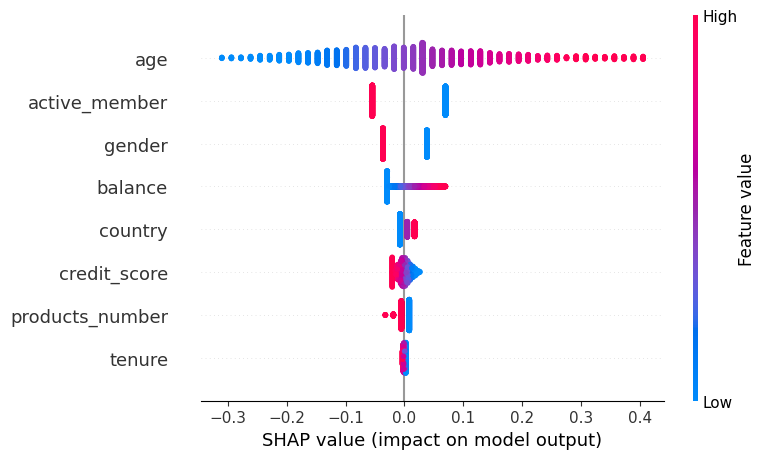

In [110]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_perturbation='interventional',feature_names=features.columns)
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

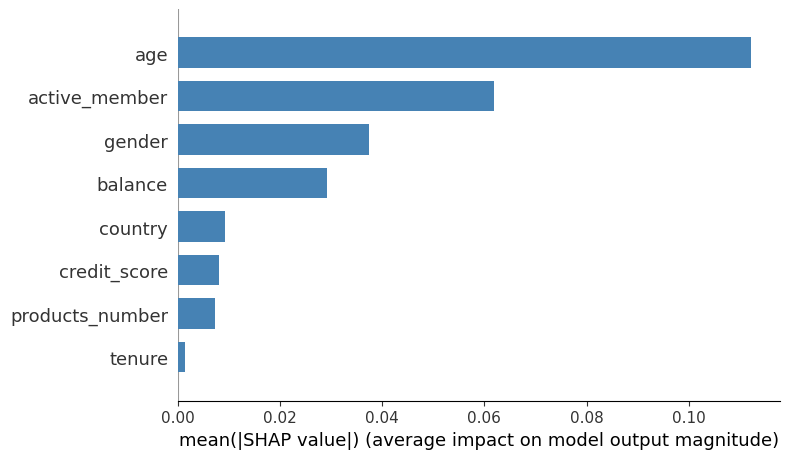

In [111]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

The age and active_member variable shows high importance than other features in predicting the churn feature

In [112]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

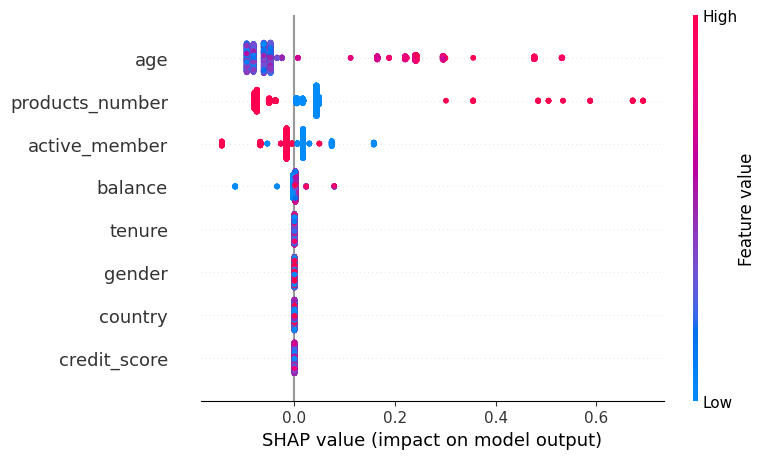

In [113]:
shap.summary_plot(shap_values_tree, X_test)

The tree model suggests that age and product_number is more signifiacnt where in linear regression, age and active_member were the most significant features.

# SHAP Analysis using AutoML

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                rmse        mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
----------------------------------  --------  ---------  --------  --------  ------------------------  ------------------  -------------------------  -------
GBM_3_AutoML_1_20240402_212713      0.311405  0.0969732  0.198407  0.218122                 0.0969732                1359                   0.039989  GBM
GBM_2_AutoML_1_20240402_212713      0.31259   0.0977125  0.19987   0.218521                 0.0977125                2044                   0.035052  GBM
GBM_1_AutoML_1_20240402_212713      0.314821  0.0991123  0.204226  0.220597                 0.0991123                2883                   0.036332  GBM
DRF_1_AutoML_1_20240402_212713      0.31783   0.101016   0.203225  0.224427                 0.101016                 3328                   0.055233  DRF
GBM_4_AutoML_1_20240402_212713      0.318355  0.10135    0.205562  0.224097                 0.10135                  1346                   0.040327  GBM
XGBoost_3_AutoML_1_20240402_212713  0.321346  0.103263   0.210814  0.225981                 0.103263                 1039                   0.033471  XGBoost
XRT_1_AutoML_1_20240402_212713      0.32841   0.107853   0.238752  0.23328                  0.107853                 3899                   0.059834  DRF
XGBoost_2_AutoML_1_20240402_212713  0.344705  0.118822   0.231887  0.247428                 0.118822                 1694                   0.009941  XGBoost
XGBoost_1_AutoML_1_20240402_212713  0.346627  0.12015    0.244798  0.252793                 0.12015                  3509                   0.017512  XGBoost
GLM_1_AutoML_1_20240402_212713      0.370365  0.13717    0.282916  0.260517                 0.13717                   753                   0.003431  GLM
[10 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

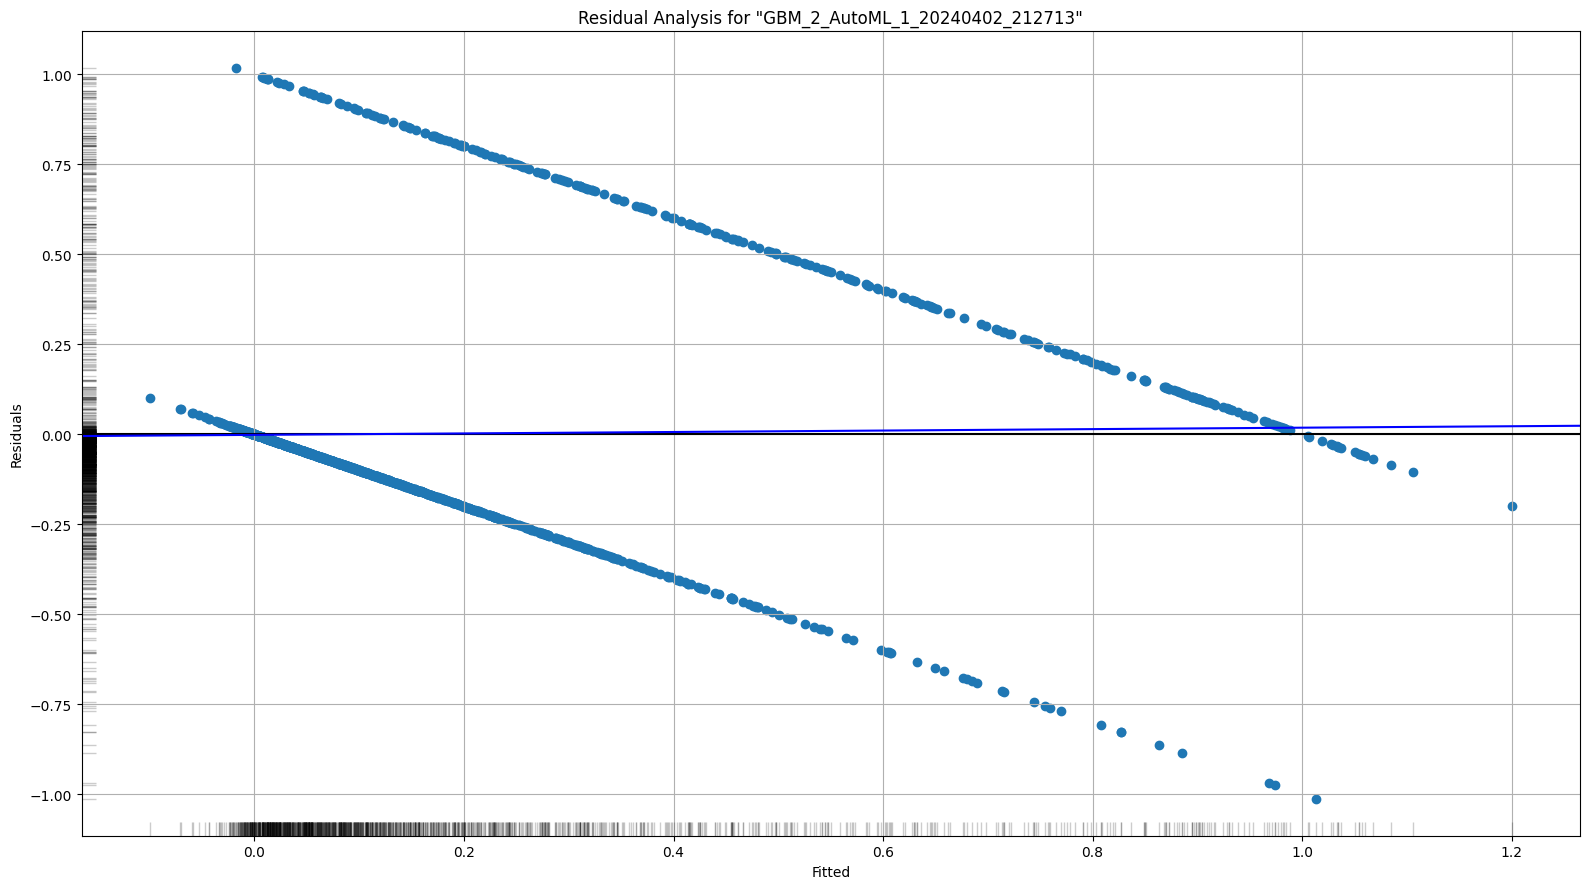

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

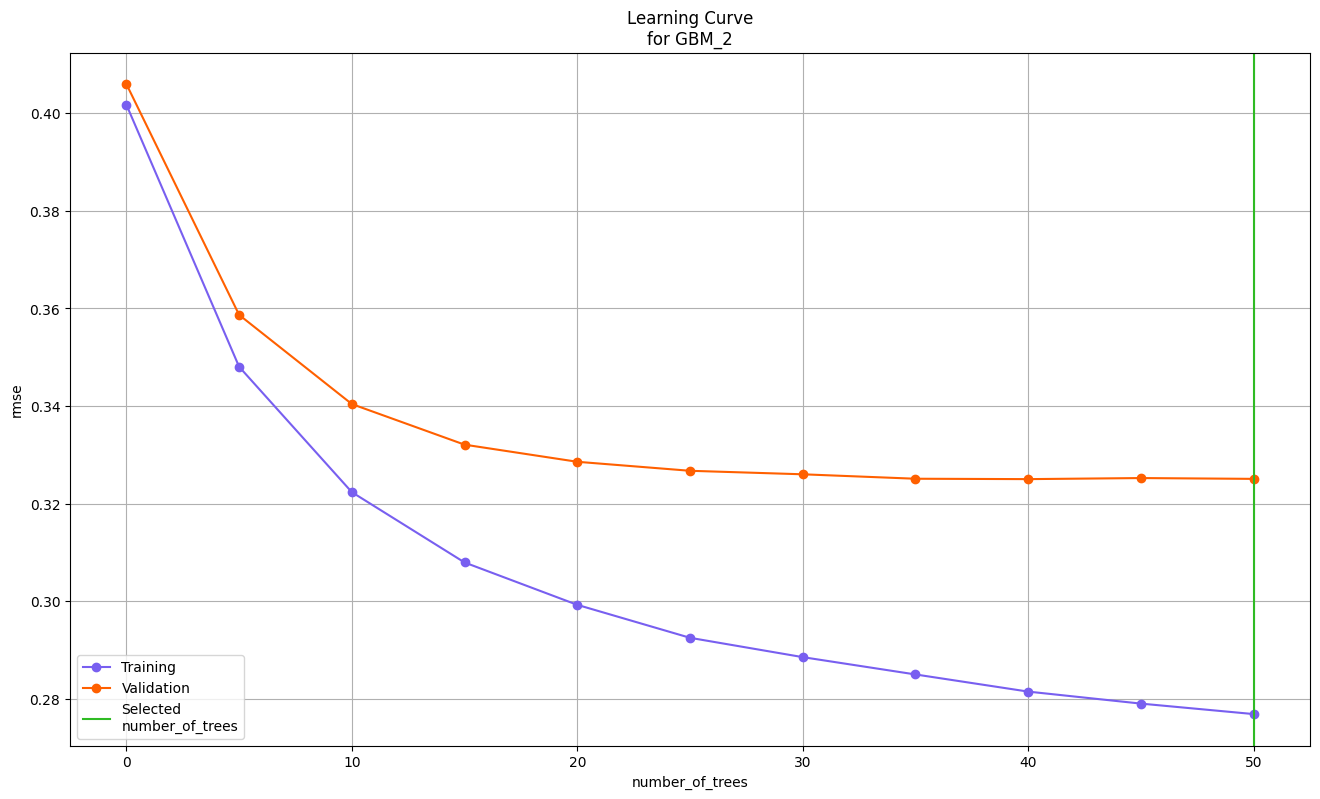

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

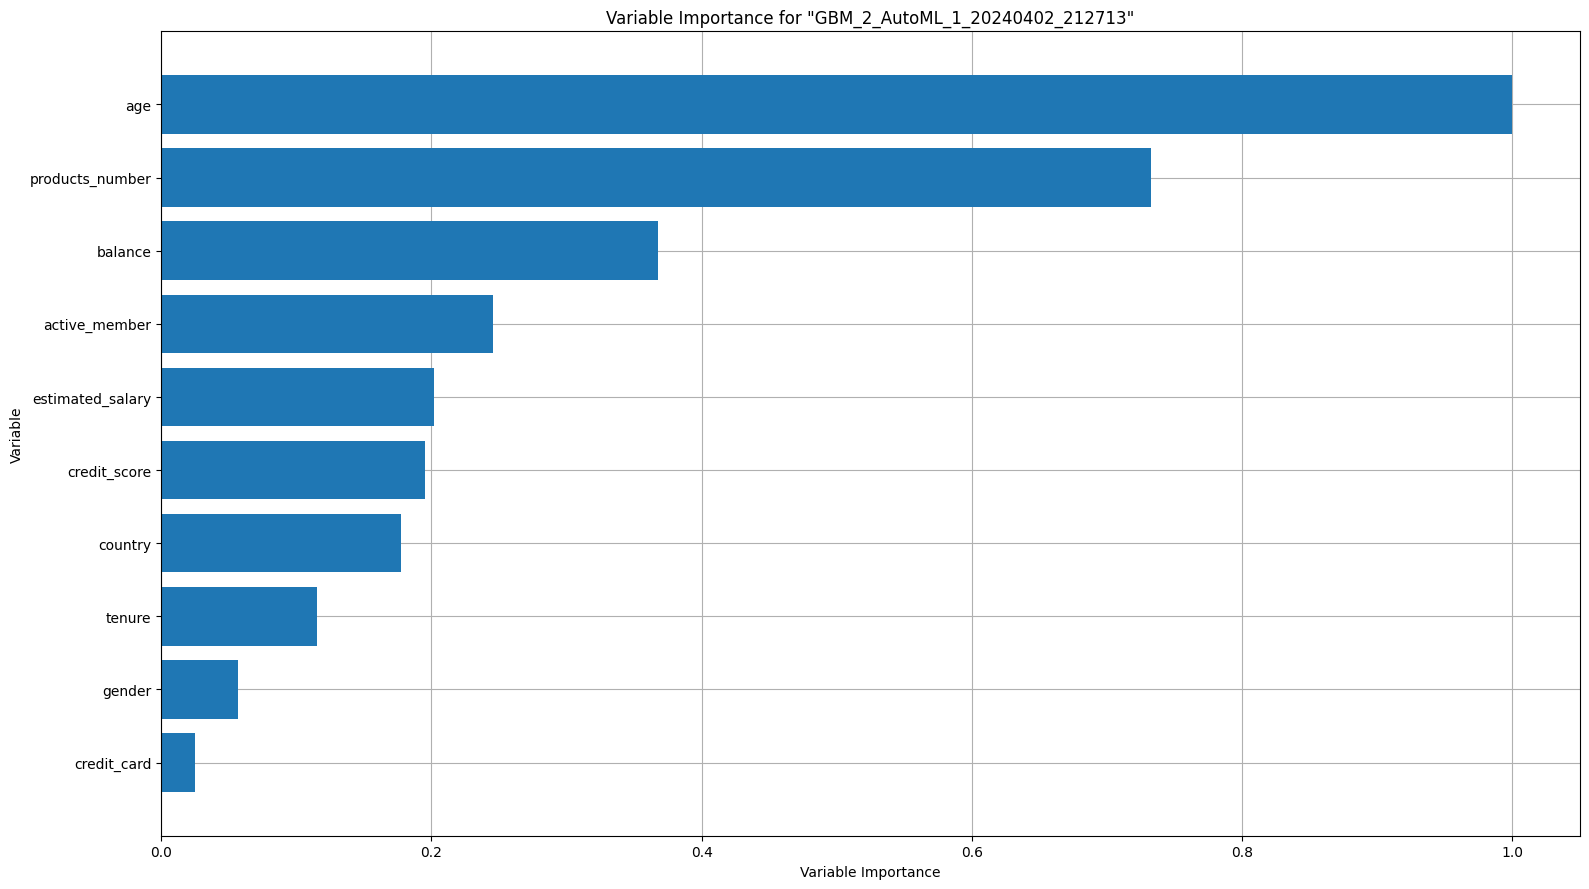

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

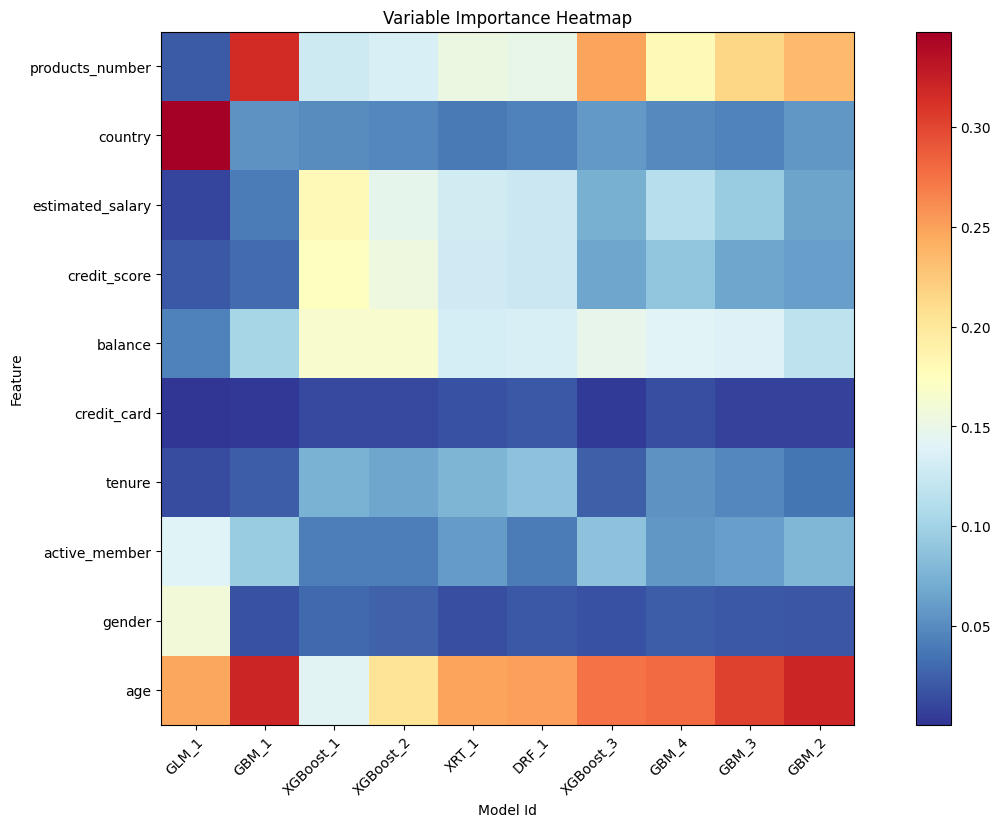

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

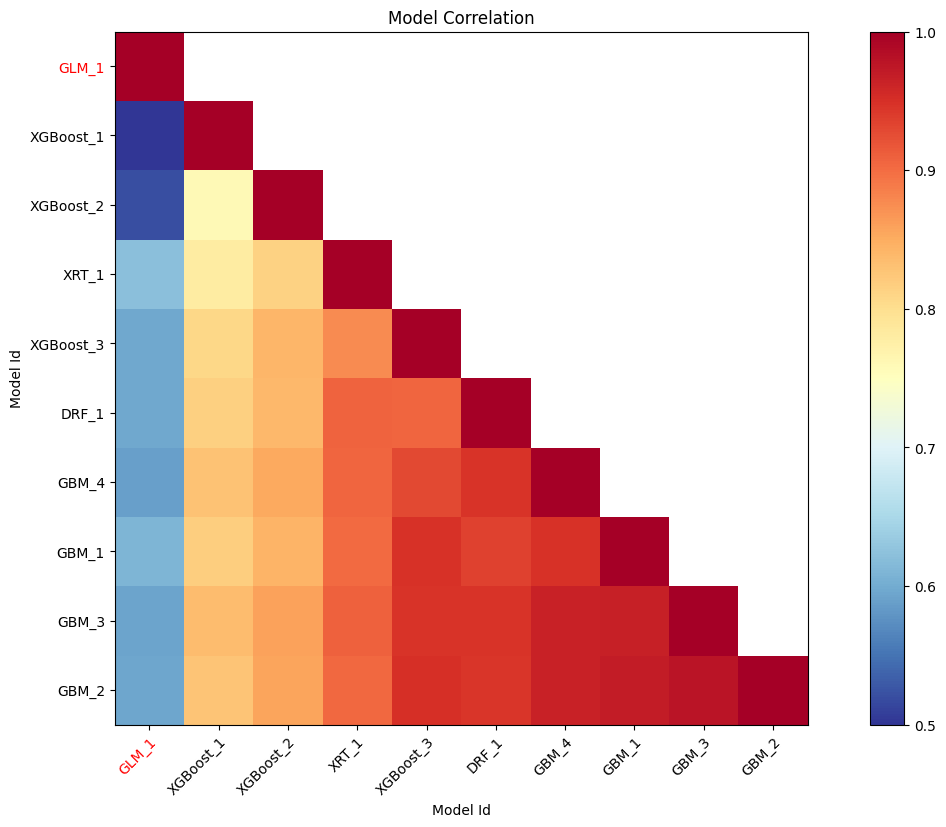

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

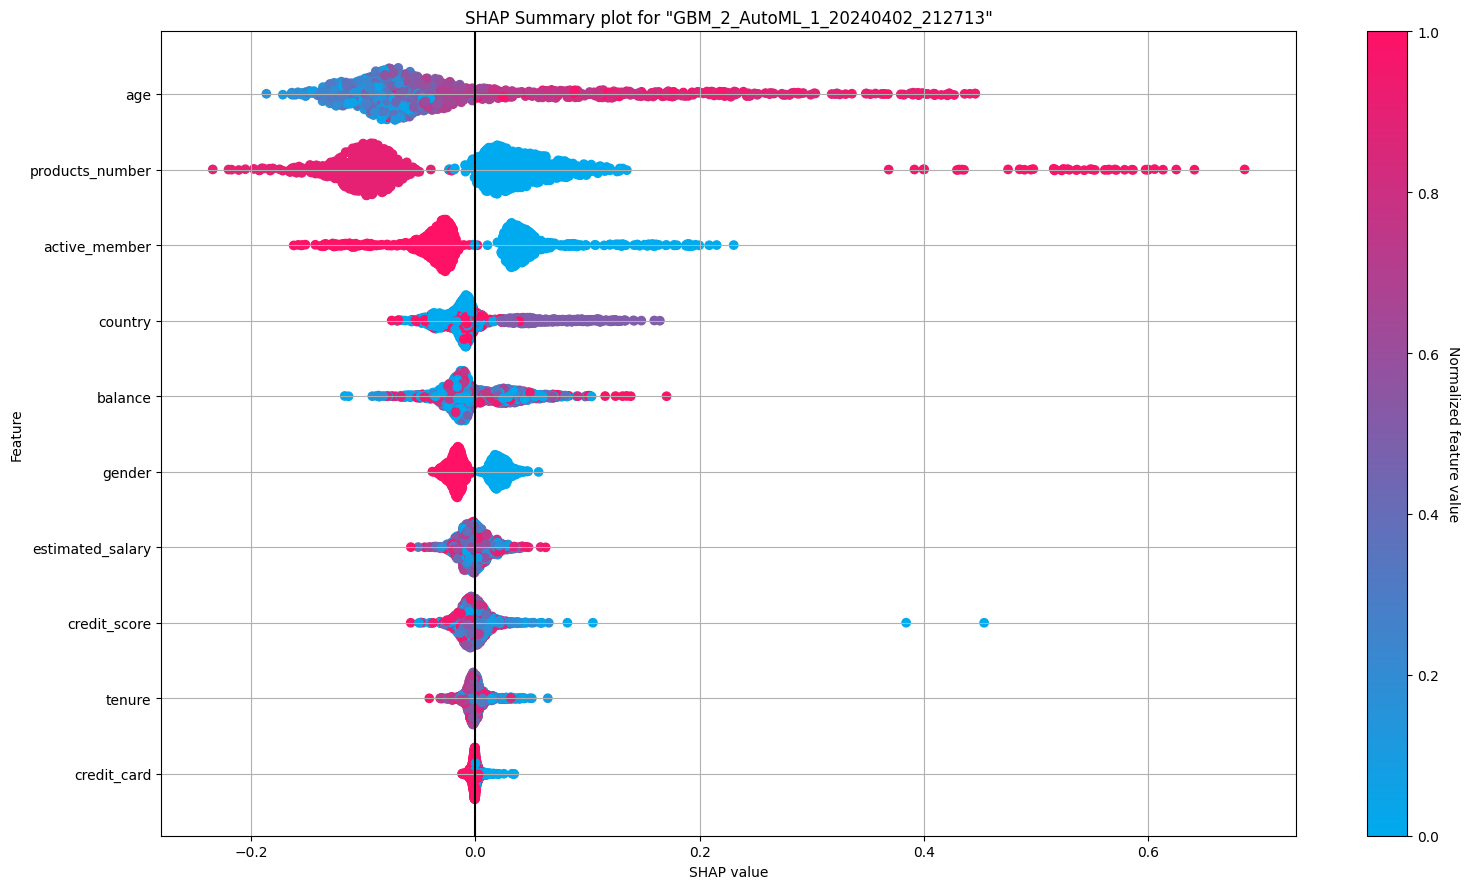

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

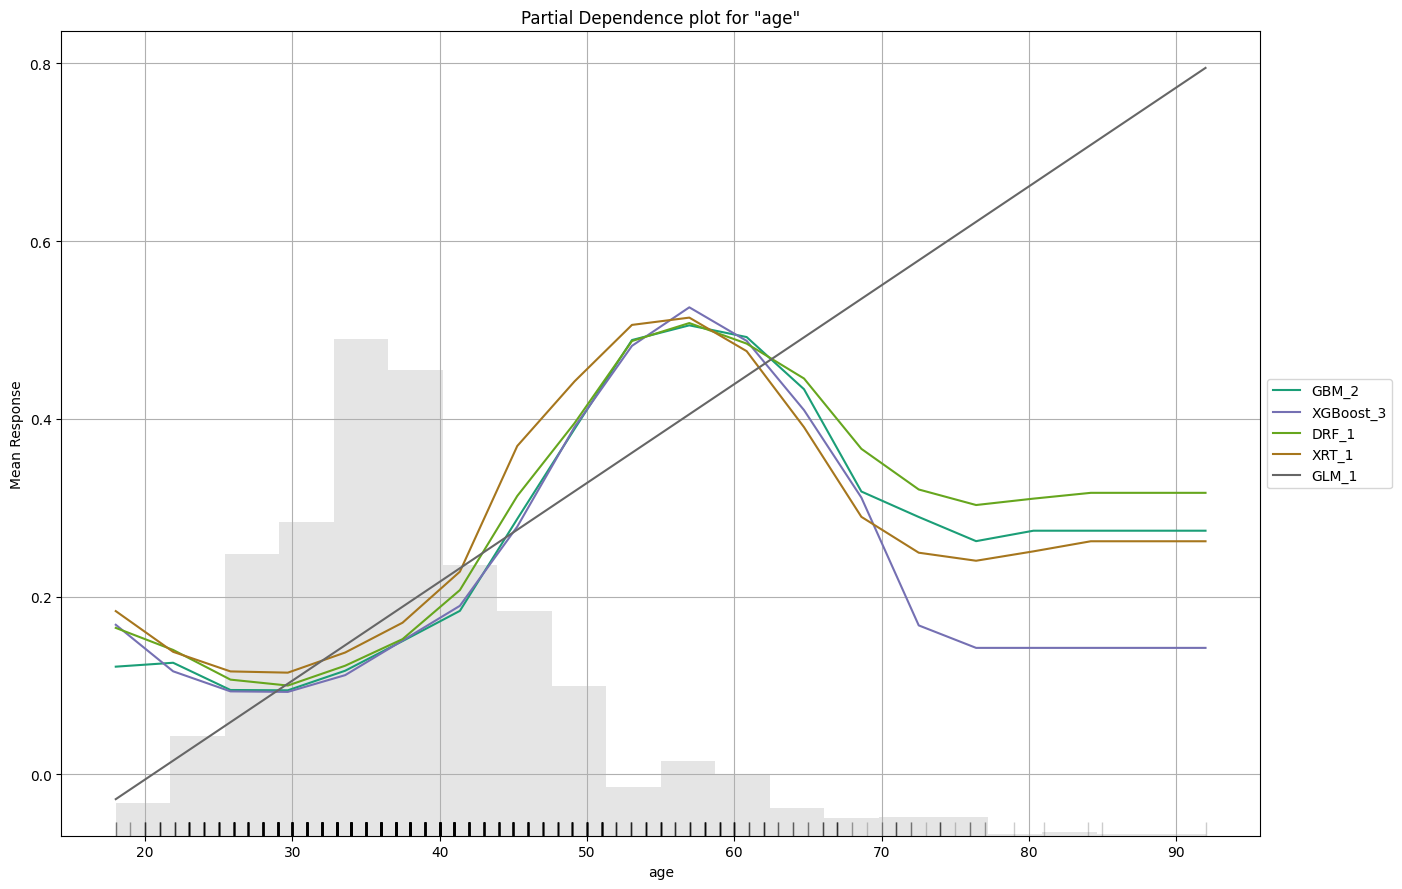

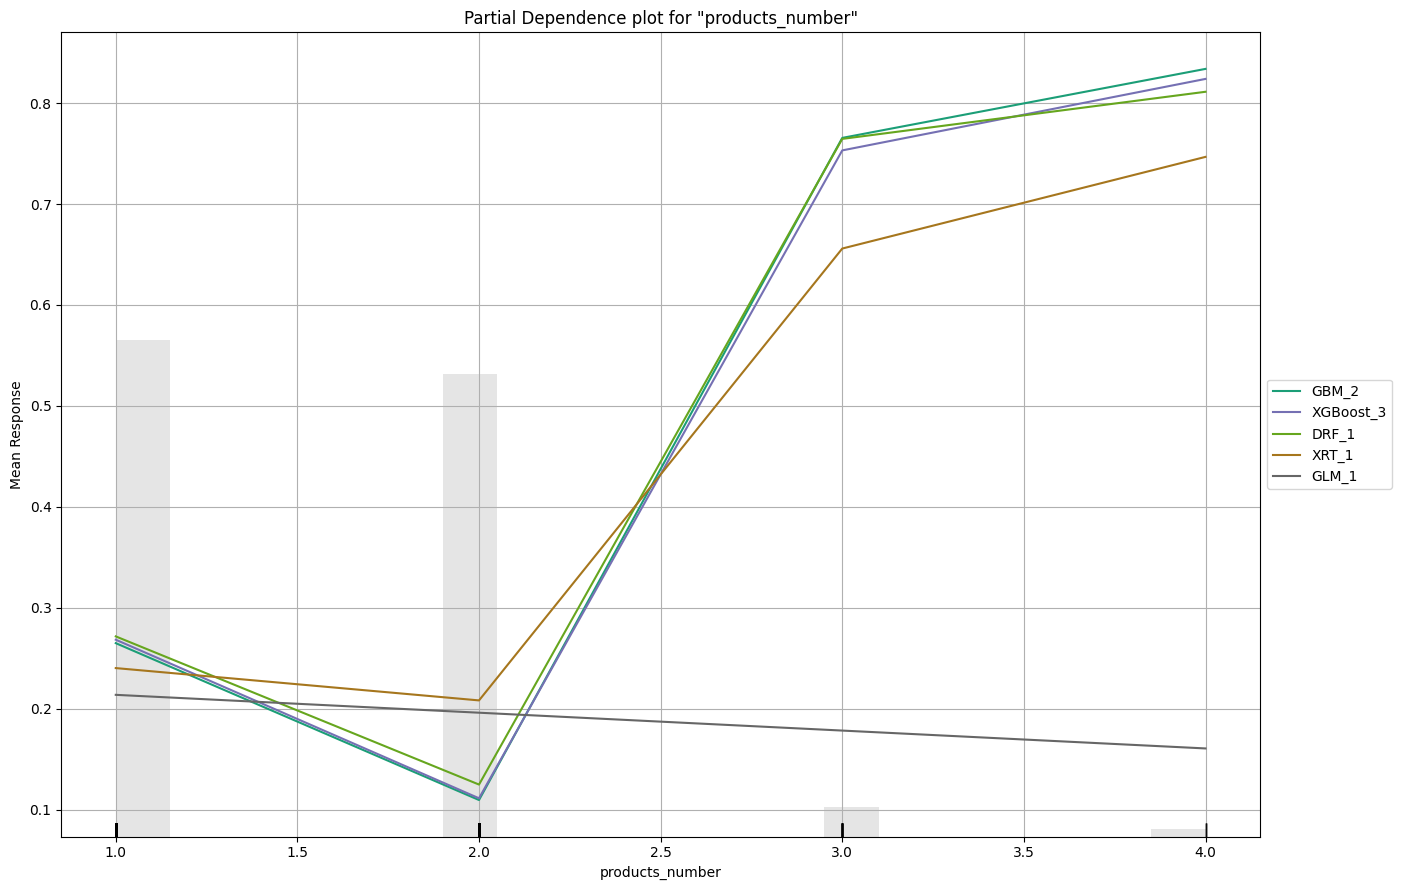

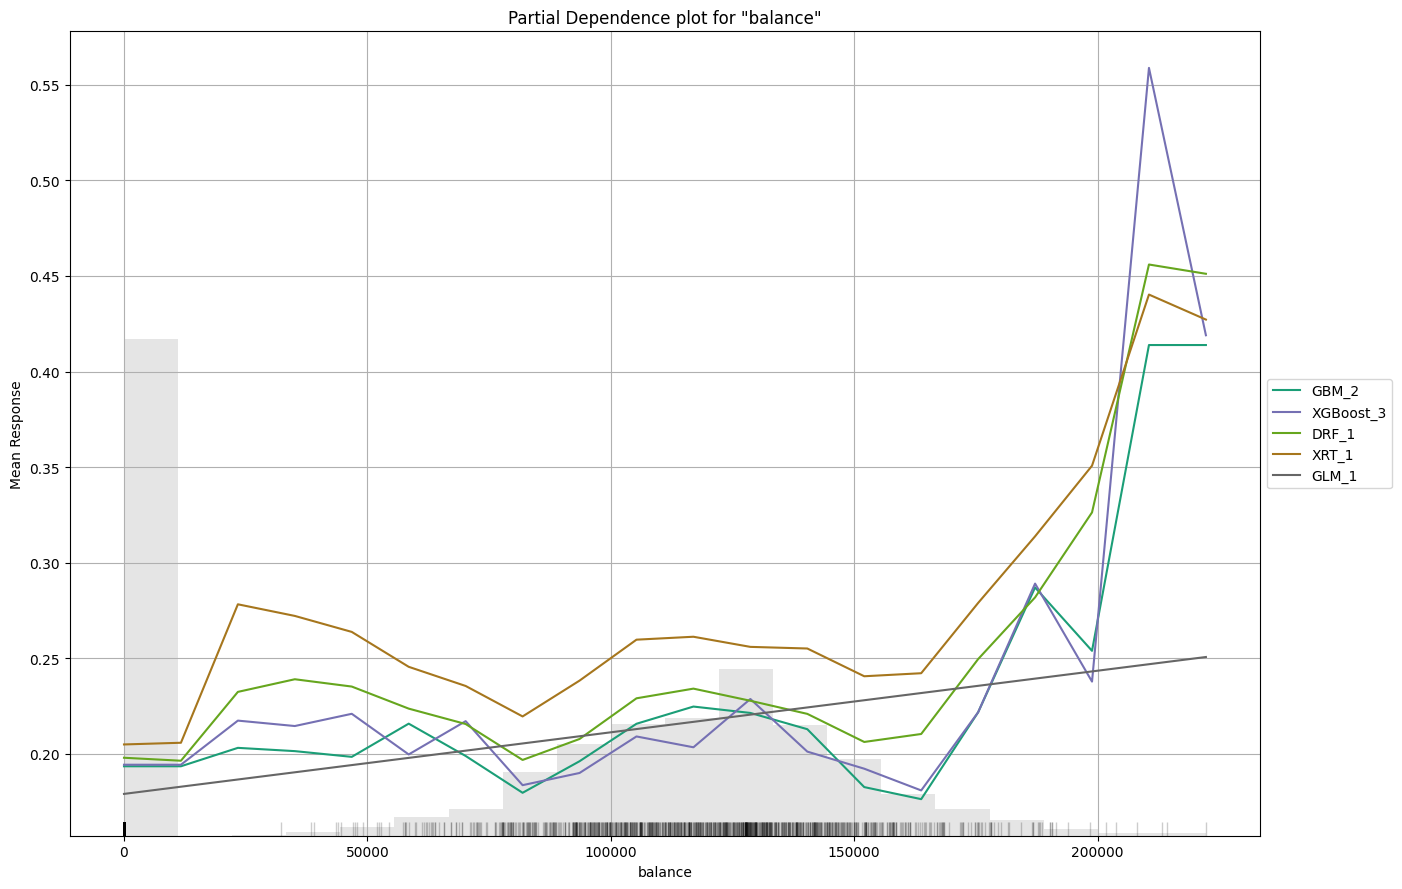

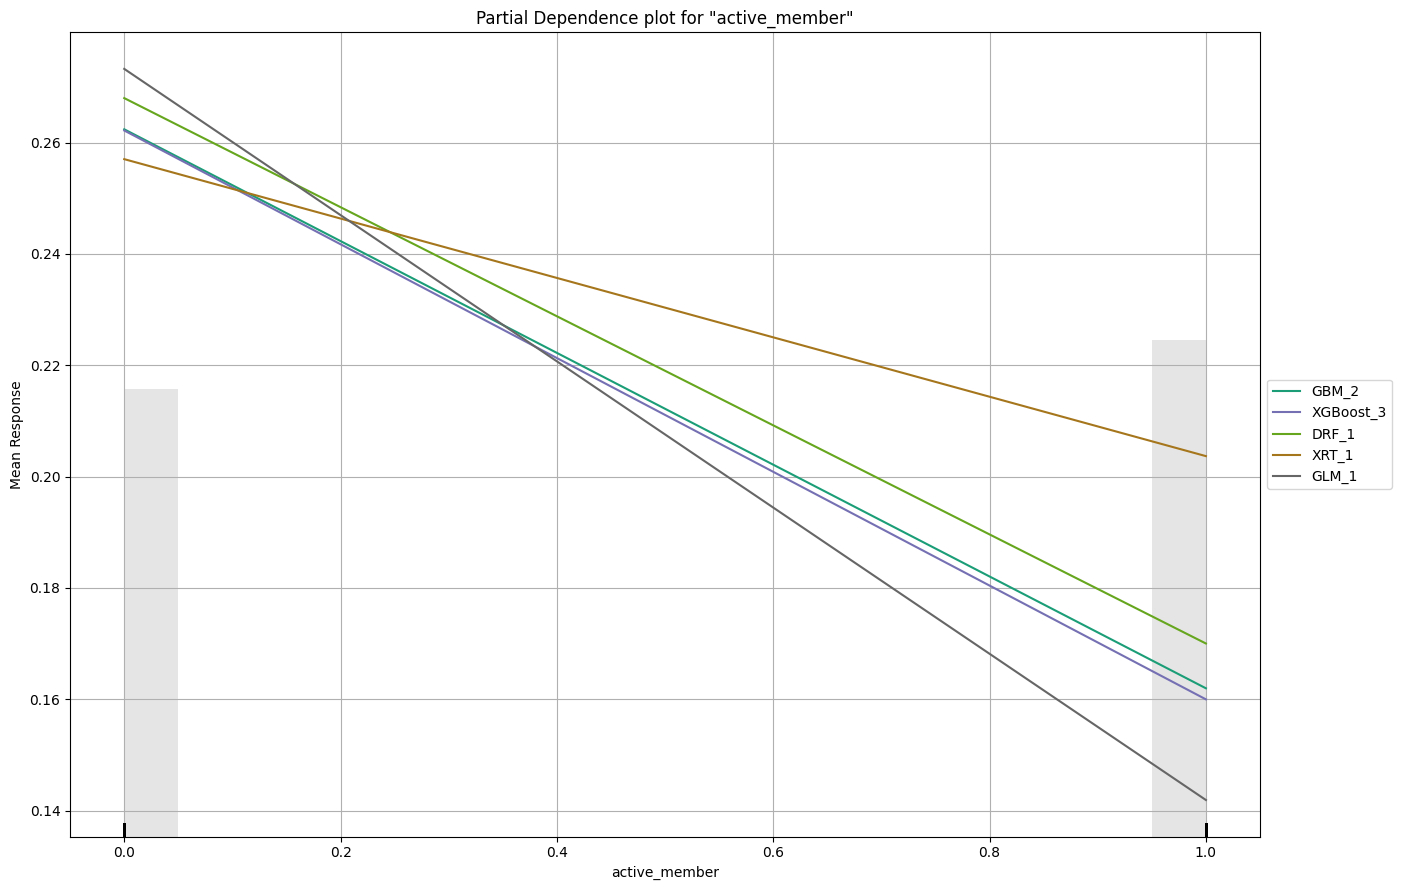

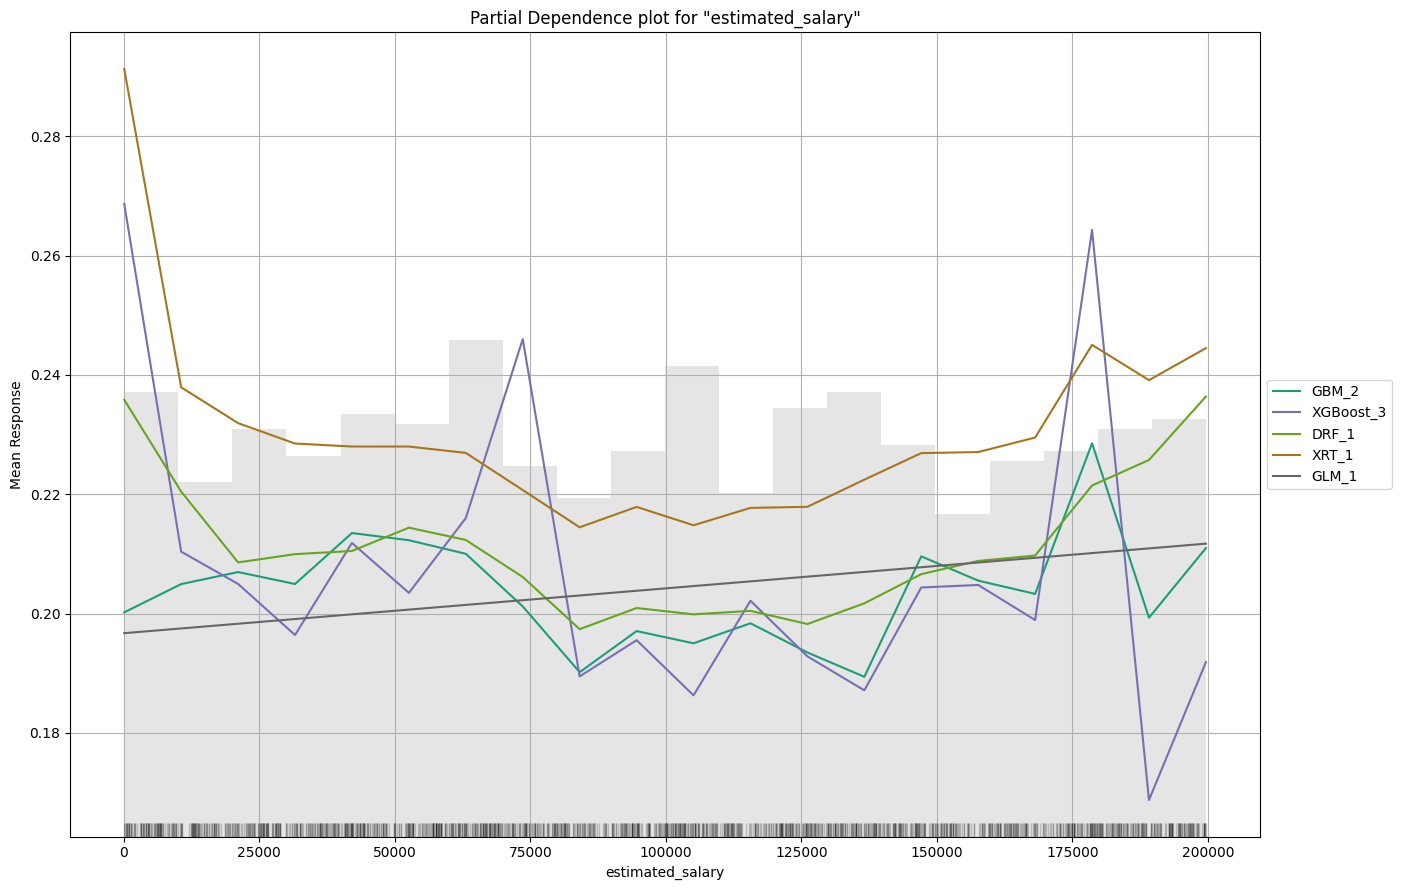

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

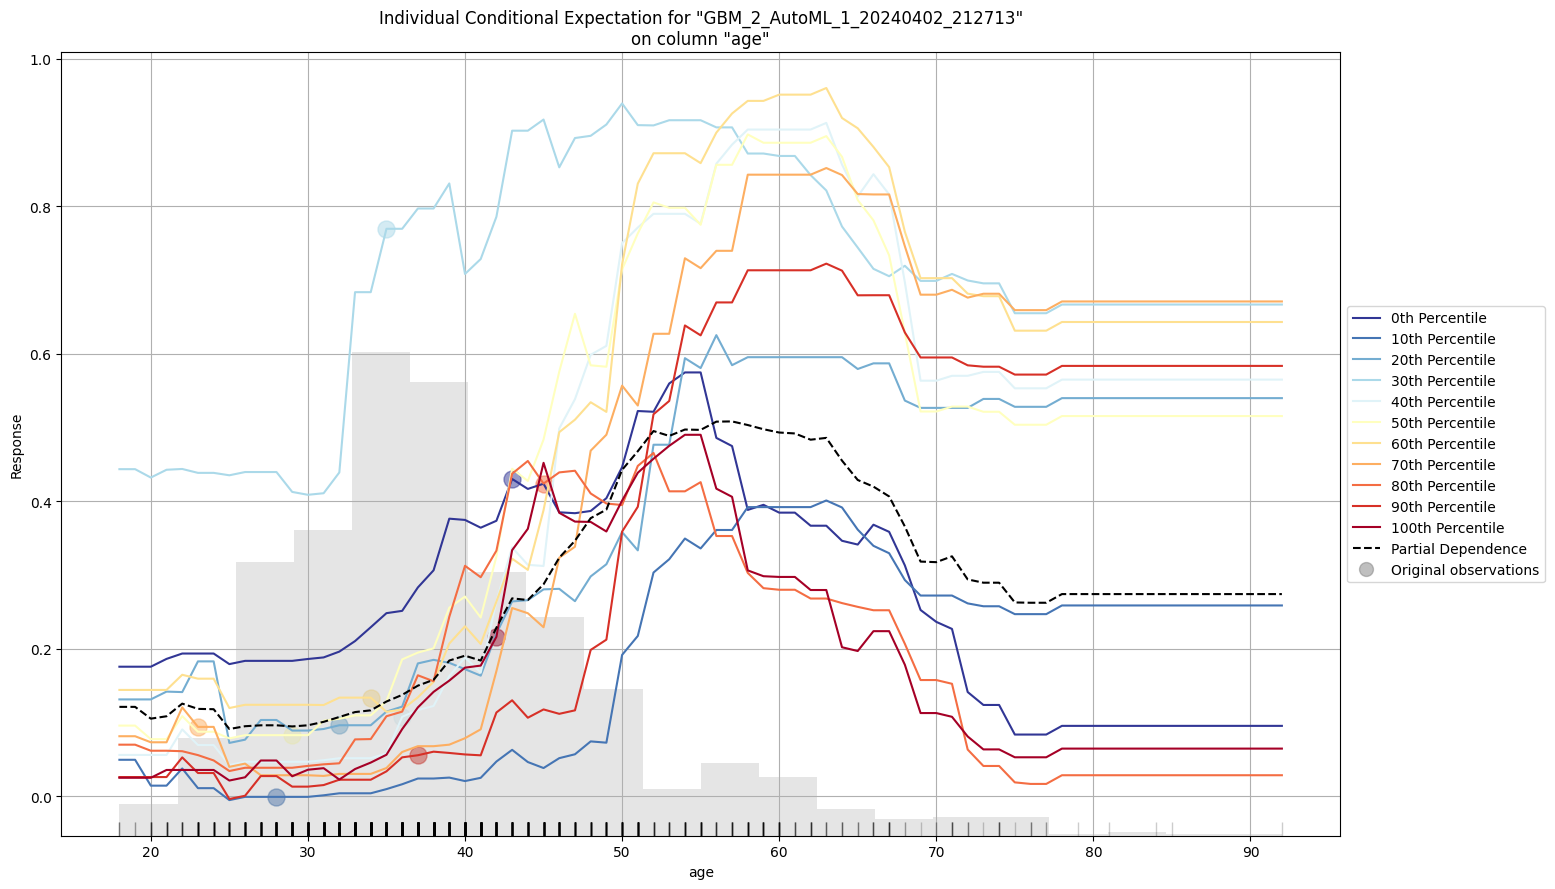

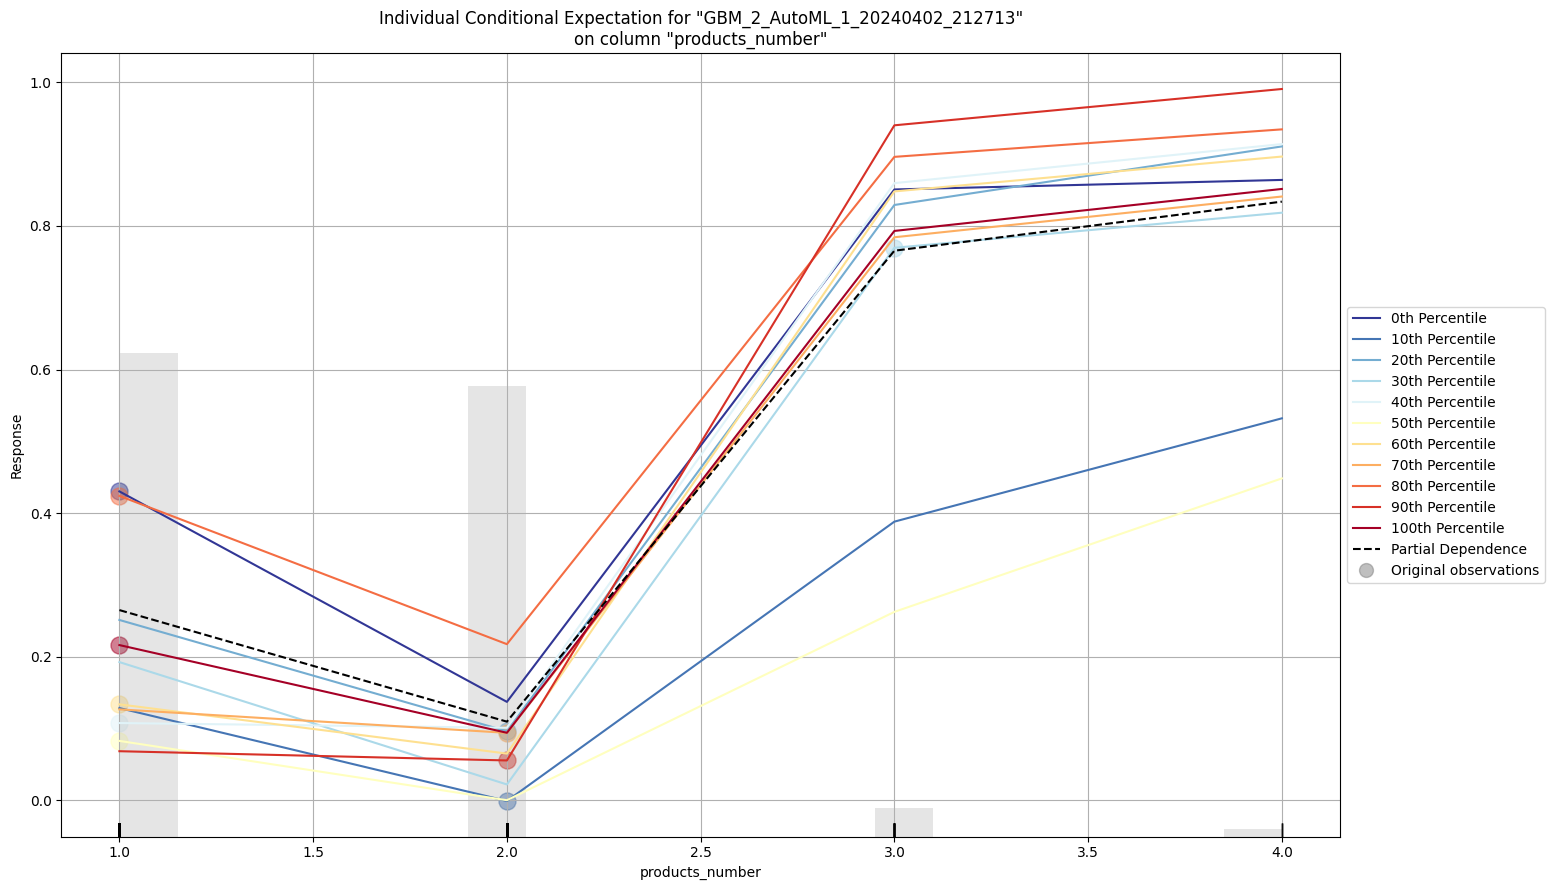

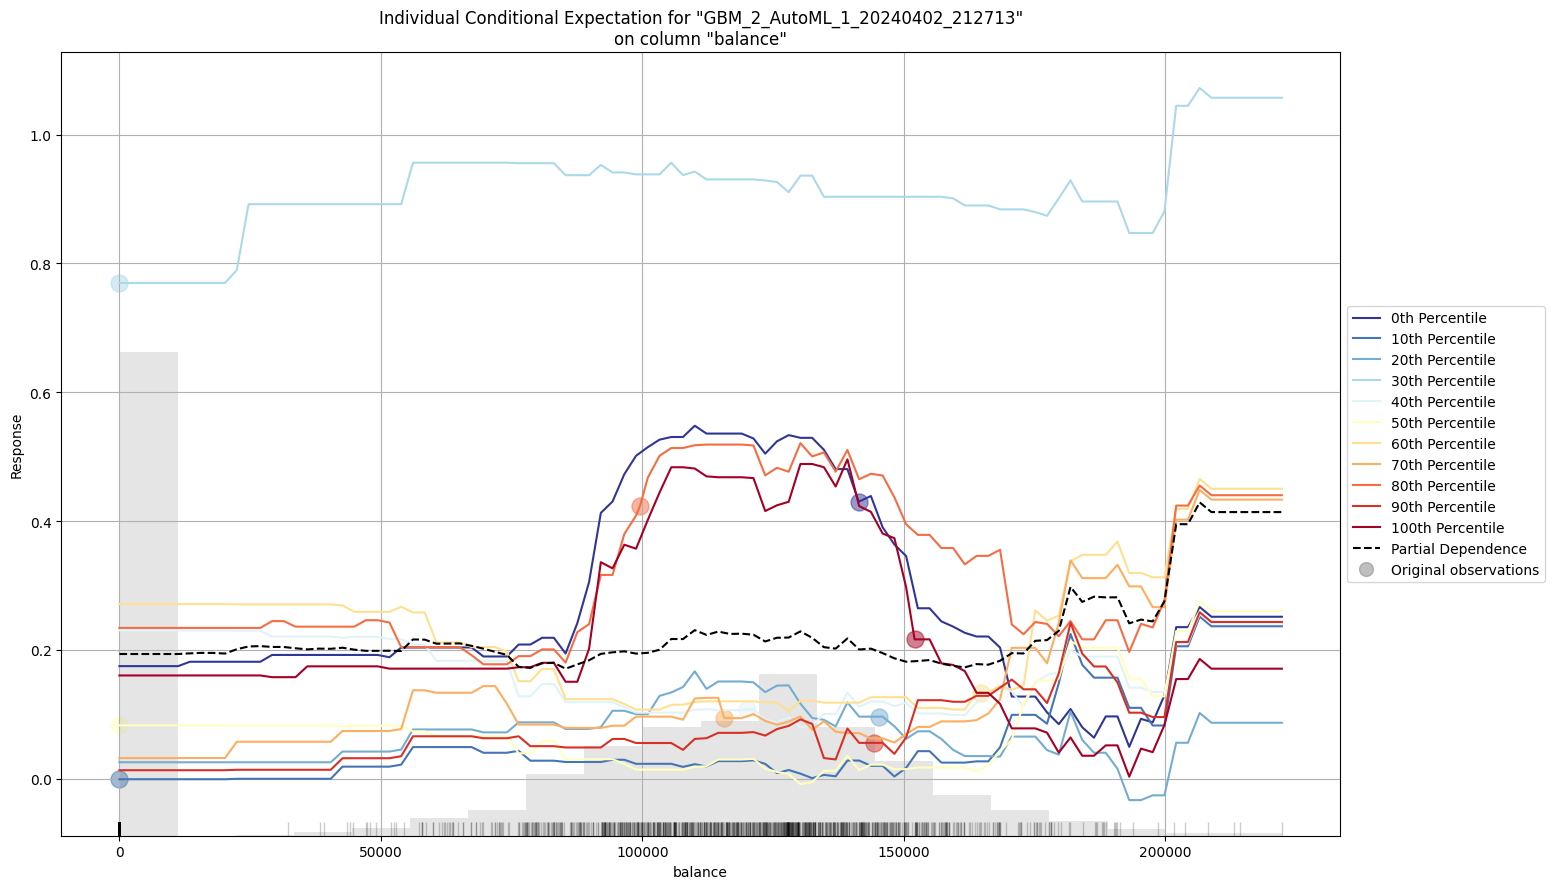

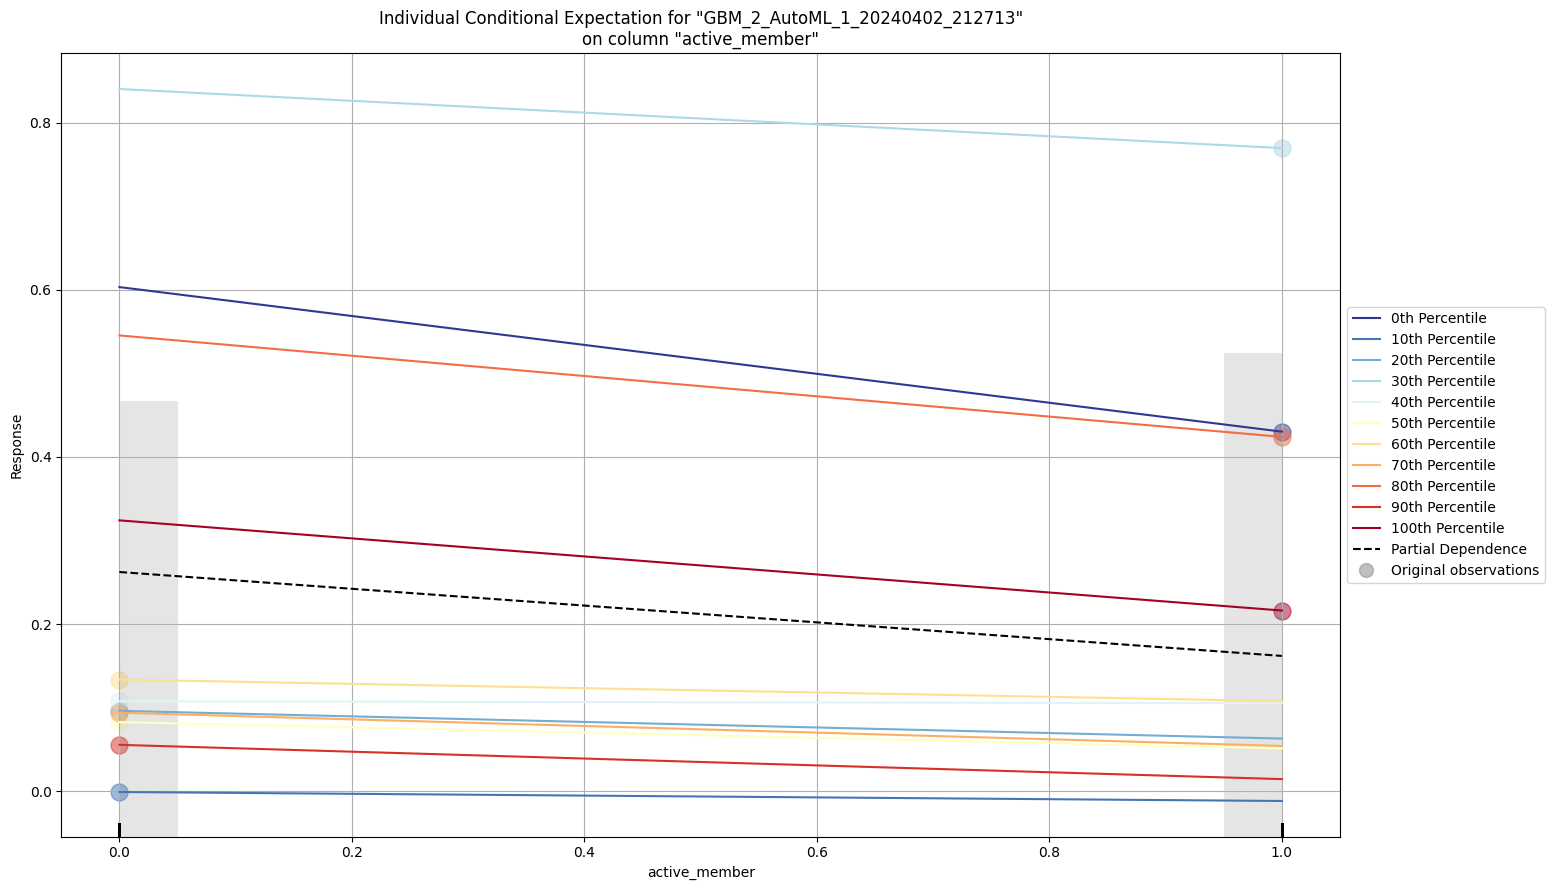

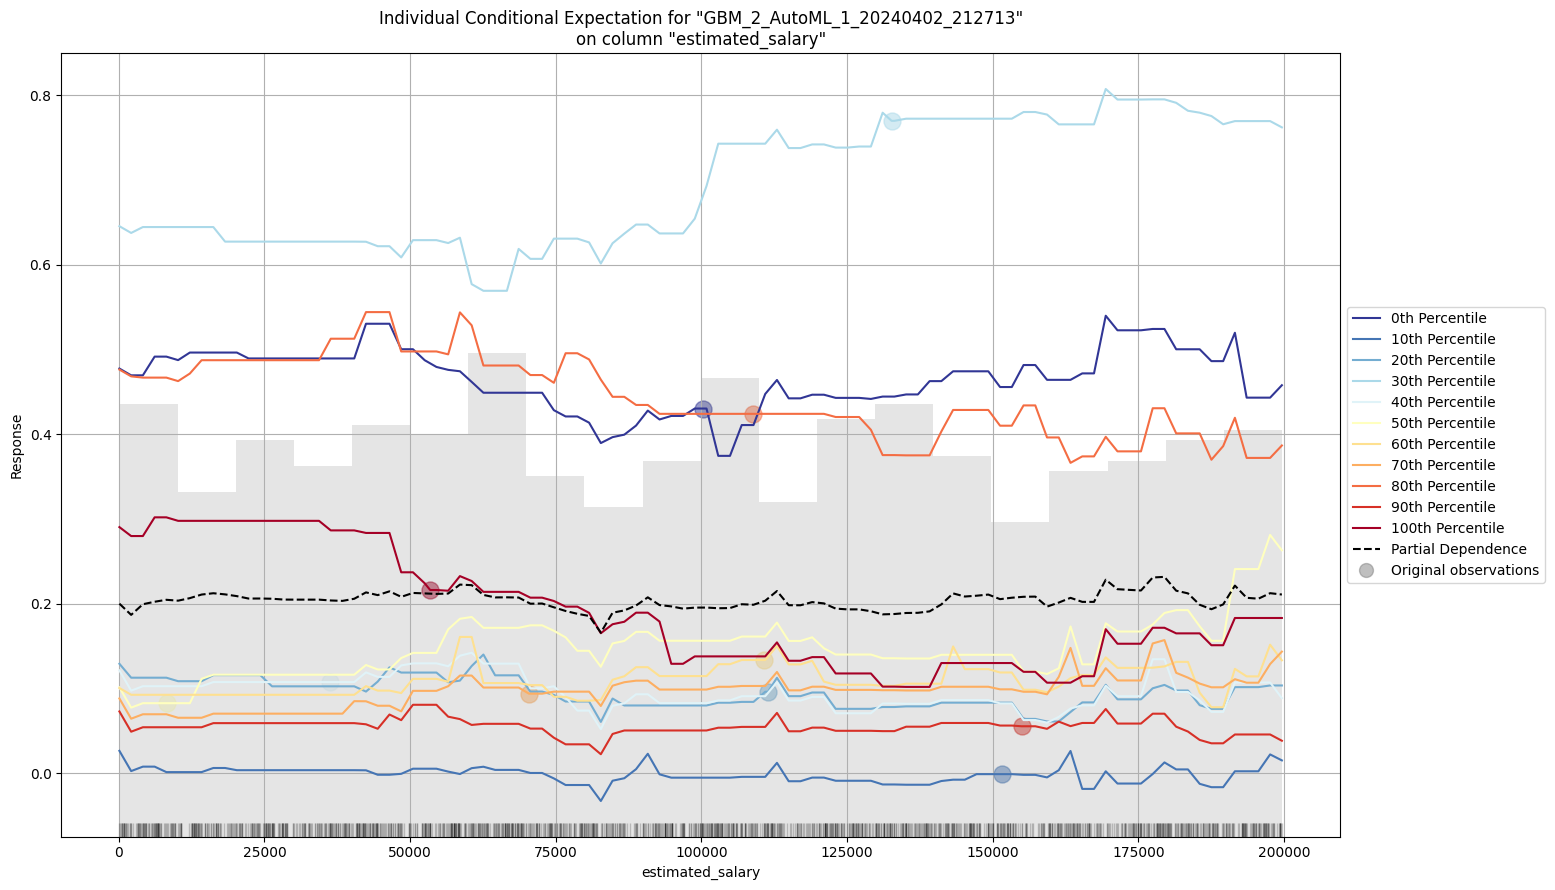

In [114]:
exm = aml.explain(test)

From Variable importance graph

age shows high importance in predicting the target varible churn. Its very high showing colinearity

credit_card of has no much importance in predicting target i.e churn

From Shap Analysis

Except age and product_number other features doesn't show high variation in the impact on target variable

# Conclusion
**From above analysis :**

The data has both numerical and categorical

age has extreme outliers and handled later for improved results and also credit_score has minimal outliers

The data has no null values

Feature scaling is done using min max scaler to get all the feature range between 0 and 1

Multi colinearity is observed in some features and removed it after checking permutation importance and VIF

Important features are selected and considered for modeling

Slight difference in model performance is observed with outlier unhandled vs outliers handled

In Linear model, SHAP abalysis shows similar inference like the feature importance approaches like OLS regression

# References:
https://scikit-learn.org/stable/modules/permutation_importance.html

GeeksForGeeks Quantile-Quantile plot documentation https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Shap Analysis is refered from https://www.analyticsvidhya.com/blog/2021/11/model-explainability/

https://docs.h2o.ai/

Assignment_1_ML_Data_Cleaning_and_Feature_Selection.ipynb

Assignment2-AutoML-Ansh.ipynb

Assignment 3-Model Interpretability-AnshVaghela.ipynb

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://www.analyticsvidhya.com/blog/2021/11/model-explainability/

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html

MIT License

Copyright (c) 2024 anshvaghela2099

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.